## Working from thesis_functions

Initial working directory is: F:\Dropbox\Dropbox\Thesis\main_code
Working at home, changing to onedrive folder
D:\Onedrive\Thesis\support\eta
succes, EIF sorted matrix found
settings: Dataframe = phot, number dropped = 1288, number of trees = 1024, samplesize = 512
succes, EIF sorted matrix found
settings: Dataframe = spec, number dropped = 1288, number of trees = 1024, samplesize = 512
succes, EIF sorted matrix found
settings: Dataframe = combi, number dropped = 1288, number of trees = 1024, samplesize = 512
succes, EIF sorted matrix found
settings: Dataframe = u_df, number dropped = 1288, number of trees = 1024, samplesize = 512
succes, EIF sorted matrix found
settings: Dataframe = u_df, number dropped = 1288, number of trees = 1024, samplesize = 512
succes, EIF sorted matrix found
settings: Dataframe = u_df, number dropped = 1288, number of trees = 1024, samplesize = 512
succes, PFA2 results found
settings: Dataframe = Photometric, run number = 100, p_difference = 0,pov = 90


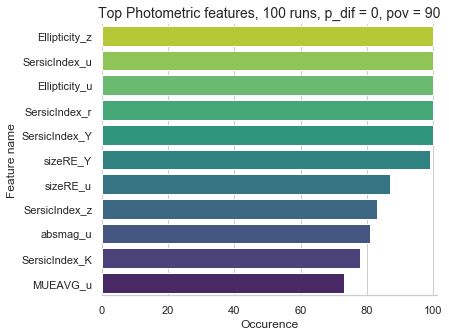

In [1]:
# All the functions of the thesis, taking scaling into account
from thesis_functions_scaled import *

In [30]:
#Working directory control
cwd = os.getcwd() 

#Selecting dataset
#change dataset here, Alpha, prichi or beta 
#dataset = "Alpha"      #Initial max row dataset
#dataset = "prichi"     #prichi < 3 filtered dataset, 24999 rows. OBSELETE
#dataset = "beta"       #prichi < 2 filtered dataset, 13787 rows
#dataset = "gamma"      #prichi < 2 filtered dataset, (removed photometric)) OBSELETE

#dataset = "delta2"      #updated DB creator, removed some photometric features 
#dataset = "epsilon"    #trimmed down version of delta, prichi <2, 10941 rows (for easier computation)

dataset = "zeta"       # Full Photometric, GaussFitSimple, prichi <2, 10941 rows × 134 columns
#dataset = "eta"       # Full Photometric, GaussFitSimple, all columns


detect_path = True   #this is for easier working in spyder

 #Set up directory path, load initial dataframes
if detect_path == True:
    print("Initial working directory is:", cwd) 
    if '31618' in cwd:
        print("Working at Dora")
        location = "dora"
    if 'Dainean' in cwd:
        print("Working at home, changing to onedrive folder")
        location = "home"
    if 'Onedrive' in cwd:
        print("Working in onedrive folder")
        location = "home"
    if 'Dropbox' in cwd:
        print("Working at home, changing to onedrive folder")
        location = "home"
    
    
    if location == "home":
        os.chdir('D:\Onedrive\Thesis\support\%s'%(dataset))
        print(os.getcwd())

    
    if location == "dora":
        os.chdir('C:\Sander\support\%s'%(dataset))
        print(os.getcwd())
            
    #Loading dataframes     Only part for now
    phot = pd.read_hdf('Parts_DB.h5', 'Photometric') 
    phot.name = "phot"
    col = pd.read_hdf('Parts_DB.h5', 'Colour')  
    col.name = "col"
    spec = pd.read_hdf('Parts_DB.h5', 'Spectral') 
    spec.name = "spec"
    spec_ds = pd.read_hdf('Parts_DB.h5', 'Direct_Summation') 
    spec_ds.name = "DS"
    full = pd.read_hdf('ThesisDB.h5', 'Dataframe').iloc[:,4:]
    full.name = "full"
    dropped = int(phot.shape[0] * 0.05)   #we can safely drop 5% of our dataset. 
    # Is this enough with such a large feature space? It seems to be more then we get by filtering EIF above 0.5 out!

#full = full.iloc[:,6:] #Addition
    combi = pd.merge(phot,spec, right_index=True, left_index=True, how='inner')  #just phot and spec
    combi.name = "combi"
    
    #setup filtered dataframes
remake = False
phot_eif  = eif_isolation(phot, dropped = dropped, remake = remake)
phot_eif.name = 'Photometric'
spec_eif  = eif_isolation(spec, dropped = dropped, remake = remake)
spec_eif.name = 'Spectral'

combi_eif = eif_isolation(combi, dropped = dropped, remake = remake)
combi_eif.name =  'Combined'
col_eif = eif_isolation(col, dropped = dropped, remake = remake)
col_eif.name = 'Colour'
full_eif = eif_isolation(full, dropped = dropped, remake = remake)
full_eif.name = "full"

DS = pd.merge(phot.iloc[:,1],spec_ds,right_index=True, left_index=True, how='inner').iloc[:,1:]
DS.name = "DS"
ds_eif  = eif_isolation(DS, dropped = dropped, remake = remake)
ds_eif.name = 'Direct_Summation'
ds_eif

dataframes = [phot_eif,spec_eif,combi_eif]

Initial working directory is: D:\Onedrive\Thesis\support\zeta
Working in onedrive folder
D:\Onedrive\Thesis\support\zeta
succes, EIF sorted matrix found
settings: Dataframe = phot, number dropped = 502, number of trees = 1024, samplesize = 512
succes, EIF sorted matrix found
settings: Dataframe = spec, number dropped = 502, number of trees = 1024, samplesize = 512
succes, EIF sorted matrix found
settings: Dataframe = combi, number dropped = 502, number of trees = 1024, samplesize = 512
succes, EIF sorted matrix found
settings: Dataframe = col, number dropped = 502, number of trees = 1024, samplesize = 512
New file requested
Failed to find this combination, creating one
EIF sorted matrix created and saved
settings: Dataframe = full, number dropped = 502, number of trees = 1024, samplesize = 512
New file requested
Failed to find this combination, creating one
EIF sorted matrix created and saved
settings: Dataframe = DS, number dropped = 502, number of trees = 1024, samplesize = 512


In [36]:
81+13+51

145

In [32]:
full_eif

absmag_u  absmag10re_u     size90_u   sizeRE_u  SersicIndex_u  \
363658  -19.456397    -19.456080    20.763389   7.487965         1.4645   
91648   -18.855348    -18.855331    22.798663   9.208962         1.1618   
418761  -18.963260    -18.963260    10.967406   8.153883         0.0280   
543977  -19.153933    -19.153859    14.979204   5.764174         1.2874   
21962   -18.715393    -18.714910    10.792467   3.802209         1.5308   
...            ...           ...          ...        ...            ...   
537397  -20.032568    -19.750006   957.923001  18.936376        19.9014   
107666  -18.810325    -18.810325    22.925437  10.247813         0.9177   
3889583 -17.174744    -17.174290    10.118659   3.577057         1.5210   
561912  -19.286656    -19.253231    23.266806   4.572908         3.6186   
362934  -20.292834    -20.119246  1515.355416  92.383010        10.3107   

         Ellipticity_u     MU@0_u     MU@E_u   MUEAVG_u   absmag_g  ...  \
363658          0.4390  21.313826  24.140280  23.259699 -20.230471  ...   
91648           0.7575  21.914389  24.085981  23.317436 -19.271235  ...   
418761          0.5792  23.794706  23.794710  23.794706 -20.162601  ...   
543977          0.4992  21.266787  23.709948  22.892124 -20.152504  ...   
21962           0.6932  19.825031  22.795057  21.892710 -19.823103  ...   
...                ...        ...        ...        ...        ...  ...   
537397          0.5542 -15.793619  27.060354  24.811520 -20.882010  ...   
107666          0.5461  23.213381  24.858231  24.200130 -19.328171  ...   
3889583         0.9593  18.888391  21.837194  20.938009 -18.194180  ...   
561912          0.5761  15.781325  23.280216  21.939661 -19.957391  ...   
362934          0.1728   8.301535  30.330082  28.434708 -20.060777  ...   

         HGVA125_EW    HGF_EW    HGA_EW  G4300_EW  CA4227_EW    CN2_EW  \
363658     0.045590 -2.281593 -2.690906 -0.770057  -2.322645  0.151500   
91648     -0.021572 -1.100943 -2.514207  1.242101   0.609565  0.085834   
418761     0.055375 -1.048793 -0.429998 -1.117378  -2.345531 -0.223362   
543977     0.074129 -1.371471 -1.010160 -0.866287   0.182117  0.083216   
21962      0.037203 -1.406763 -2.905533  0.031142   0.237418 -0.088145   
...             ...       ...       ...       ...        ...       ...   
537397     0.103118 -2.021721  0.165248 -6.198633  -1.754586 -0.101309   
107666     0.115784 -3.612355 -8.270797  2.333831  -3.476108  0.090052   
3889583   -0.057993 -1.507025 -1.218973  3.008249  -1.537271 -0.284228   
561912     0.038094 -1.775003 -4.308096  2.905445   3.836447 -0.085573   
362934     0.100411 -1.503191  0.780196 -0.524690  -1.194846  0.327464   

           CN1_EW    HDF_EW    HDA_EW      OII_EW  
363658   0.107933 -2.330916 -2.571940   13.769998  
91648    0.057188 -2.102723 -3.530085   15.063868  
418761  -0.073651 -3.785802 -4.008588   12.313859  
543977   0.073221 -1.693860 -1.899695   17.057638  
21962   -0.062126 -2.632079 -0.271176   12.112485  
...           ...       ...       ...         ...  
537397  -0.174955 -1.258369  0.347563   -1.822185  
107666   0.180667 -6.279347 -6.894634   28.733673  
3889583 -0.177694 -4.633734 -6.805264  124.157417  
561912  -0.068905 -1.684549 -2.862004   32.383125  
362934   0.265087  1.435877  5.290615    0.762388  

[9545 rows x 145 columns]

In [43]:
spec_eif

D4000N    OIIR_EW    OIIB_EW    HB_EW_x  OIIIB_EW_x  OIIIR_EW_x  \
550553  1.168990   8.040441   2.814952   2.160781    0.462448    1.642335   
417300  1.280221   7.413089   2.594473   2.942384    0.681301    1.129359   
569024  1.183172  11.562148   4.046268   3.679919    1.239081    3.579067   
267200  1.131634  11.269740   3.943562   2.420198    0.839661    1.741712   
21962   1.184169  10.165667   3.557562   2.664723    1.146719    2.690294   
...          ...        ...        ...        ...         ...         ...   
107769  1.090700  22.050497   7.717419   3.439505    3.462390   10.704365   
299156  1.094331  19.266138   6.746939  13.081241    7.855967   23.984682   
15852   1.045549  48.175835  16.851122  15.432920   12.674813   34.211845   
91368   1.266279 -29.899466 -10.597490   6.101979    3.594699    7.540283   
342694  1.065487  52.711109  18.460461  15.383878    6.959693   32.644695   

          HA_EW_x  NIIB_EW_x  NIIR_EW_x  SIIB_EW_x  SIIR_EW_x     OIB_EW  \
550553  15.793979   1.996937   5.756421   3.586976   2.712419   0.422892   
417300  14.482355   2.029694   5.990888   3.055666   1.995110   0.487394   
569024  21.912285   1.925263   7.420376   4.396683   3.445629   1.031495   
267200  21.392389   2.994815   8.047102   3.598984   2.689249   1.321633   
21962   18.054508   1.621013   6.142031   4.884374   3.111521   0.687833   
...           ...        ...        ...        ...        ...        ...   
107769  40.562672   4.947672   9.945137  10.044284   7.251133  11.573815   
299156  77.411011   2.600135  16.917212  14.239573   9.992091   5.416300   
15852   70.580780   1.364105   9.171049  12.709623   9.231949   2.252820   
91368   34.992733   4.230198  12.347121   6.429978   2.924029  -0.430552   
342694  64.963623   4.218399  15.205573  13.718003   7.655091   1.032060   

           OIR_EW  
550553   0.012320  
417300  -0.268057  
569024   0.550623  
267200  -0.017809  
21962   -0.365694  
...           ...  
107769  36.512539  
299156   0.793838  
15852   -0.260889  
91368   -0.638267  
342694  -0.825365  

[9545 rows x 13 columns]

succes, PFA2 results found
settings: Dataframe = Spectral, run number = 100, p_difference = 0,pov = 90


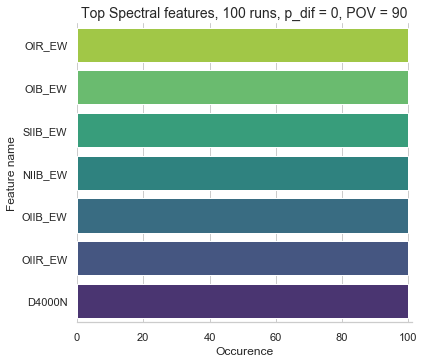

column_name  occurence
0      OIR_EW      100.0
1      OIB_EW      100.0
2     SIIB_EW      100.0
3     NIIB_EW      100.0
4     OIIB_EW      100.0
5     OIIR_EW      100.0
6      D4000N      100.0

In [42]:
def plot_PFA(eif_df, run_nr = 15, p_dif = 0, pov = 90, remake = False):
    """
    Parameters
    ----------
    eif_df : pandas dataframe
        This needs to befiltered with anomaly detection such as EIF already
    run_nr : Integer, optional
        Amount of runs to do. The default is 15.
    p_dif : int, optional
        p > q, slightly higher number of features is in some cases needed. The default is 0.
    pov : int, optional
        Retained variability in %. The default is 90.
    remake : Boolean, optional
        Set to True if you want to remake previously stored data. The default is False.

    Returns
    -------
    dataframe with column numbers of eif_df and occurence of these columns over all runs combined
    a bar plot showing the occurence parameters over run_nr runs. This plot has been adjusted to 
    only display parameters which occur atleast 0.10 * run_nr amount of times (10%)

    """
    try:
        DF_name = eif_df.name
    except:
        DF_name = "custom"
    #    
        
    results_df = pfa2_loader(eif_df, run_nr = run_nr, p_dif = p_dif, pov = pov, remake = remake)   

    # -------------------------------------------------------------
    # We now have loaded (and if required created) a dataframe with results for n_list
    # If we want to change n_list, we must make sure it's saved and loaded by a new name, or replace the old
    sns.set(style="whitegrid")


    #Set up the variables
    results_top = results_df[results_df.iloc[:,1].values >= run_nr * 0.2]


    #    Setting up the size of the plot, dependant on the number of outputs 
    fig, ax = plt.subplots(figsize=(6,5.5))

    #Do the actual plotting
    sns.barplot(x='occurence',y='column_name',data=results_top,palette ="viridis_r")
    ax.set(xlim= [0,run_nr+1],xlabel="Occurence",ylabel = "Feature name")
    plt.title("Top %s features, %i runs, p_dif = %i, POV = %i" %(DF_name,run_nr,p_dif,pov),size='14')
    sns.despine(left=True, bottom=False)   #removes spines
    plt.savefig("pics/PFA/PFA2_%s_%i_%i_%i"%(DF_name,run_nr,p_dif,pov),bbox_inches="tight")
    plt.show()
    
    return results_df
#for i in dataframes:
 #   PFA2_plot(i, 100)
plot_PFA(spec_eif, 100)

succes, PFA2 results found
settings: Dataframe = Photometric, run number = 100, p_difference = 0,pov = 90


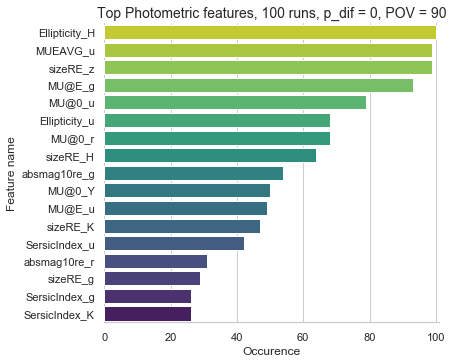

succes, PFA2 results found
settings: Dataframe = Photometric, run number = 100, p_difference = 2,pov = 90


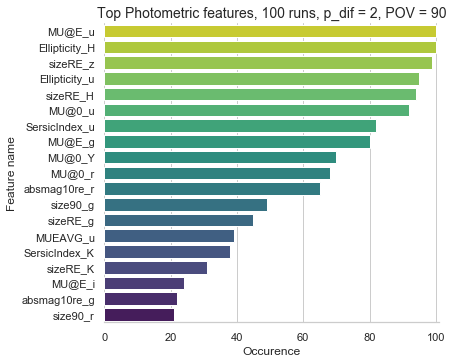

succes, PFA2 results found
settings: Dataframe = Spectral, run number = 100, p_difference = 0,pov = 90


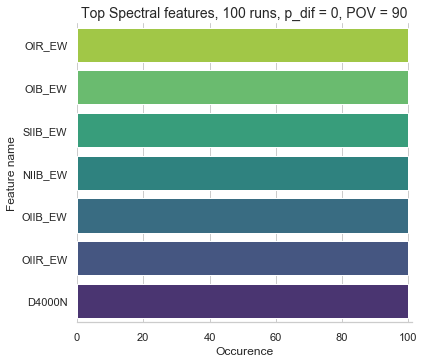

succes, PFA2 results found
settings: Dataframe = Spectral, run number = 100, p_difference = 2,pov = 90


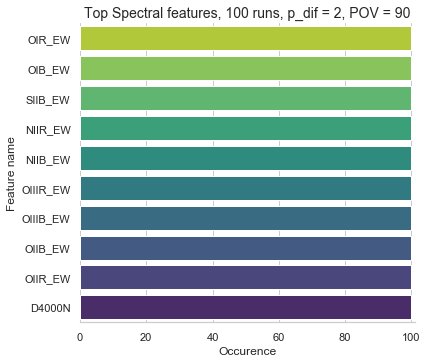

succes, PFA2 results found
settings: Dataframe = Combined, run number = 100, p_difference = 0,pov = 90


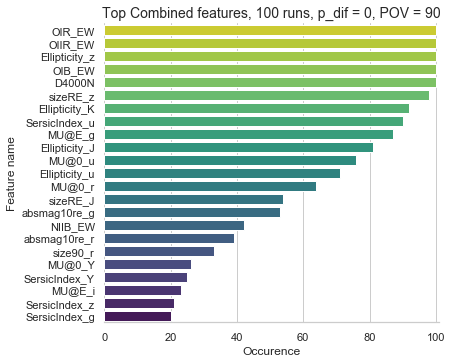

succes, PFA2 results found
settings: Dataframe = Combined, run number = 100, p_difference = 2,pov = 90


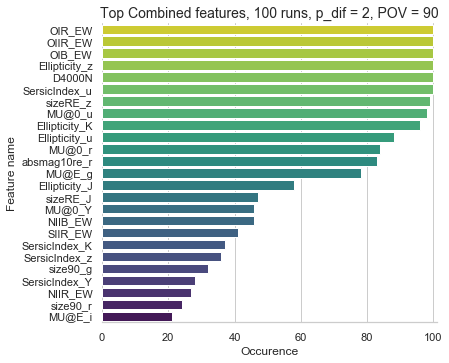

In [9]:
for i in dataframes:
 #   PFA_plot(i, 10,100)
    plot_PFA(i, 100)
   # plot_PFA(i, 100, pov = 80)
    plot_PFA(i, 100, p_dif = 2)    

succes, Hybrid results found
Settings: Database: Photometric, k = 3


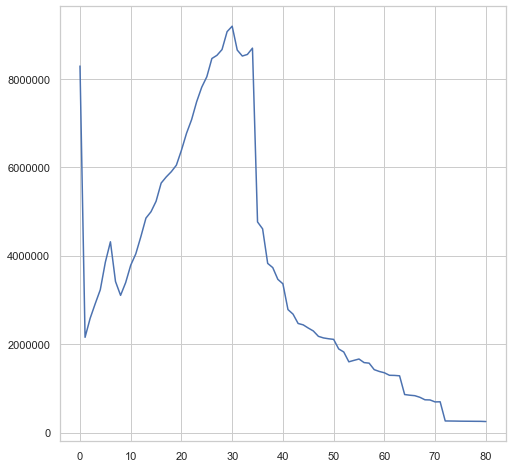

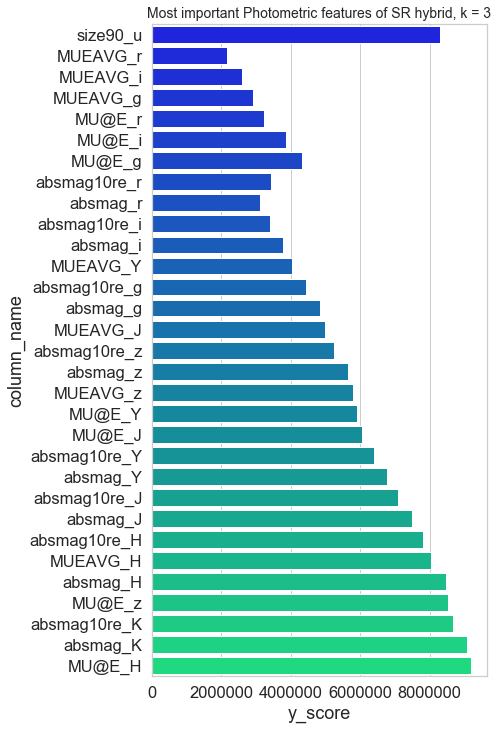

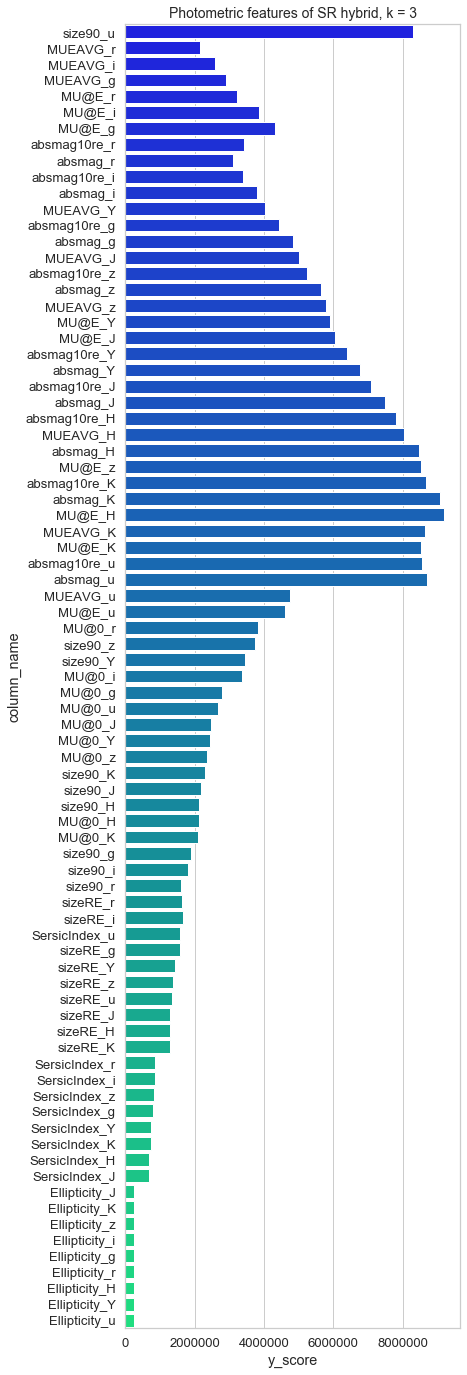

succes, Hybrid results found
Settings: Database: Combined, k = 3


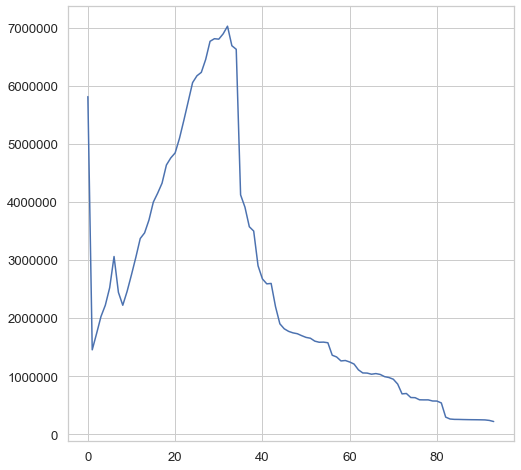

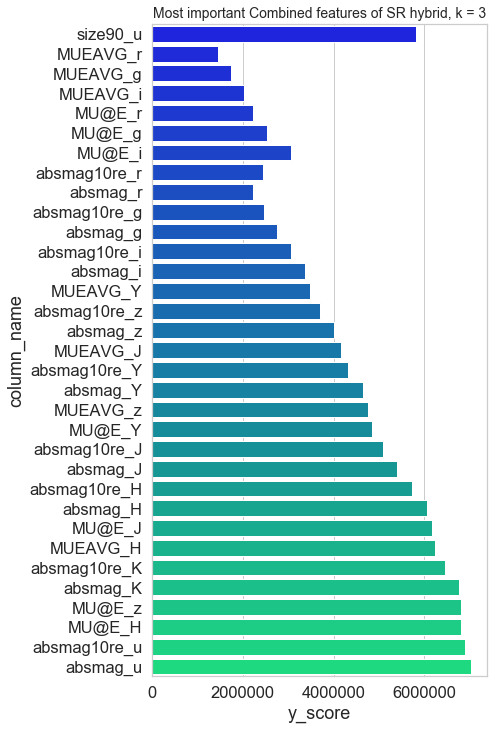

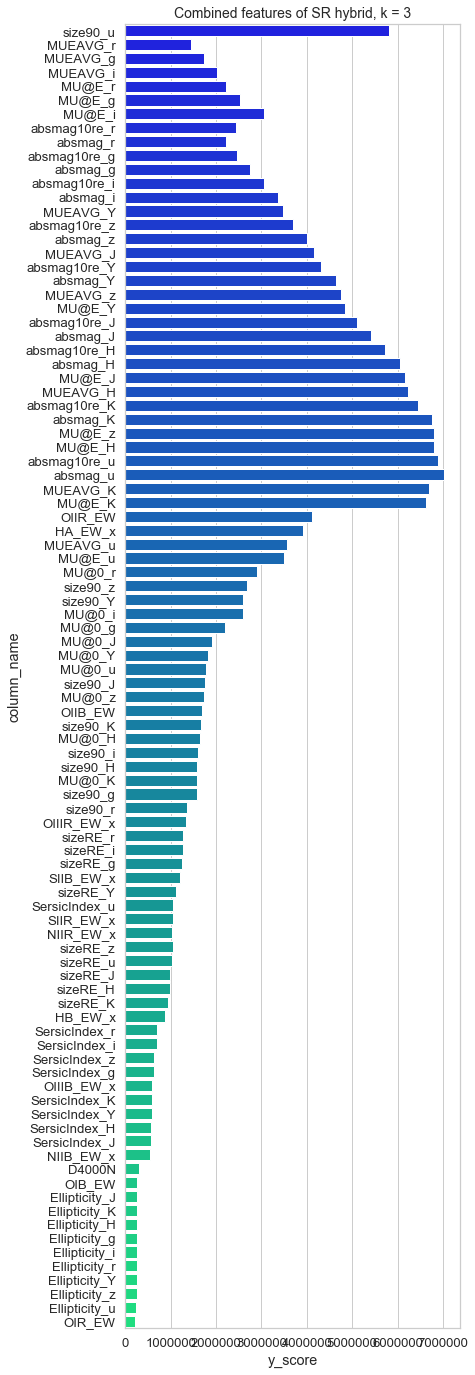

(     column_name      y_score
 0       size90_u  5811929.000
 1       MUEAVG_r  1455459.125
 2       MUEAVG_g  1736016.500
 3       MUEAVG_i  2027501.625
 4         MU@E_r  2222771.500
 5         MU@E_g  2524510.250
 6         MU@E_i  3060813.250
 7   absmag10re_r  2444507.500
 8       absmag_r  2222319.500
 9   absmag10re_g  2463457.500
 10      absmag_g  2749610.000
 11  absmag10re_i  3048659.500
 12      absmag_i  3369954.500
 13      MUEAVG_Y  3467567.250
 14  absmag10re_z  3688099.250
 15      absmag_z  3996736.000
 16      MUEAVG_J  4151163.750
 17  absmag10re_Y  4322730.500
 18      absmag_Y  4634989.000
 19      MUEAVG_z  4756972.000
 20        MU@E_Y  4842901.500
 21  absmag10re_J  5095461.000
 22      absmag_J  5404818.500
 23  absmag10re_H  5728035.500
 24      absmag_H  6052529.500
 25        MU@E_J  6170004.500
 26      MUEAVG_H  6228891.000
 27  absmag10re_K  6451165.000
 28      absmag_K  6762914.000
 29        MU@E_z  6807787.000
 30        MU@E_H  6799969.000
 31  abs

In [18]:
def WNCH(X, cluster_predict, n_clusters,  L_r,):
    """
    Weighted Normalised Calinski-Harabasz Index
    input: 
    X = pandas dataframe, shape: (n_samples , n_features). Each is a single data point
    Will assume lap_part if none is given
    lables = an array, shaped to (n_samples), predicting the label for each sample
    Will assume cluster_predict if none is given
    
    Returns:
    score as a float
    possible adjustment proposed:First number explodes so start n_features at 0 rather then 1.
    This means the graph always starts at 0
    """
    
    n_features = X.shape[1]
    n_samples = X.shape[0]    #the sample size, or n
    
    extra_disp = 0.
    intra_disp = 0.
    
    mean = np.mean(X, axis=0).values # mean of the whole partial matrix, per feature


    for k in range(n_clusters):
        cluster_k = X[cluster_predict == k].values   # a matrix with just objects belonging to this cluster
        mean_k = np.mean(cluster_k, axis=0)                 # the mean vector for every feature
        extra_disp += len(cluster_k) * np.sum((mean_k - mean) ** 2)  #add to the trace of S_B (non diagonal cancel out)
        intra_disp += np.sum((cluster_k - mean_k) ** 2)              #add to the trace of S_W (non diagonal cancel out)
    
    y =  (extra_disp * (n_samples - n_clusters) * n_features) / (intra_disp * (n_clusters - 1) * L_r )
    #print('y =',y)
    if intra_disp == 0.:
        return 1
    else:
        return y
     #%%   
def WNCH2(X, cluster_predict, n_clusters,  L_r,):
    """
    Weighted Normalised Calinski-Harabasz Index, alternative
    input: 
    X = pandas dataframe, shape: (n_samples , n_features). Each is a single data point
    Will assume lap_part if none is given
    lables = an array, shaped to (n_samples), predicting the label for each sample
    Will assume cluster_predict if none is given
    
    Returns:
    score as a float
    ===============
    Adjustment made: First number explodes so start n_features at 0 rather then 1.
    This means the graph always starts at 0
    """
    
    n_features = X.shape[1]
    n_samples = X.shape[0]    #the sample size, or n
    
    extra_disp = 0.
    intra_disp = 0.
    
    mean = np.mean(X, axis=0).values # mean of the whole partial matrix, per feature


    for k in range(n_clusters):
        cluster_k = X[cluster_predict == k].values   # a matrix with just objects belonging to this cluster
        mean_k = np.mean(cluster_k, axis=0)                 # the mean vector for every feature
        extra_disp += len(cluster_k) * np.sum((mean_k - mean) ** 2)  #add to the trace of S_B (non diagonal cancel out)
        intra_disp += np.sum((cluster_k - mean_k) ** 2)              #add to the trace of S_W (non diagonal cancel out)
    
    #print('y =',y)
    if intra_disp == 0.:
        return 1
    else:
        y =  (extra_disp * (n_samples - n_clusters) * (n_features-1)) / (intra_disp * (n_clusters - 1) * L_r )
        return y
                
 #%%   
#non weighted nor normalised Calinski-Harabasz (comparison reasons)
def CH(X, cluster_predict, n_clusters):
    """
    Calinski-Harabasz Index
    input: 
    X = pandas dataframe, shape: (n_samples , n_features). Each is a single data point
    Will assume lap_part if none is given
    lables = an array, shaped to (n_samples), predicting the label for each sample
    Will assume cluster_predict if none is given
    
    Returns:
    score as a float
    """
    n_samples = X.shape[0]    
    extra_disp, intra_disp = 0., 0.
    mean = np.mean(X, axis=0).values # mean of the whole partial matrix, per feature


    for k in range(n_clusters):
        cluster_k = X[cluster_predict == k].values  # a matrix with just objects belonging to this cluster
        mean_k = np.mean(cluster_k, axis=0)                 # the mean vector for every feature
        extra_disp += len(cluster_k) * np.sum((mean_k - mean) ** 2)
        intra_disp += np.sum((cluster_k - mean_k) ** 2)

    return (1. if intra_disp == 0. else
        extra_disp * (n_samples - n_clusters) /
        (intra_disp * (n_clusters - 1.)))
#%%


def LS_WNCH_SR(eif_df, k = 3, remake = False):
    """
    Laplacian Score-WNCH-Simple Ranking 
    ======================================
    Input:
    DF_name: Name of the dataframe, one of four possible right now, this is an F * N matrix
    F = number of features, N = number of datapoints)
    dropped: amount of data to be filtered with EIF
    k: the value of k for the k-means clustering test
    remake: Wether or not to remake the laplacian order matrix (memory intensive)
    
    ======================================
    Output: 
    
    ===============================================================
    Description:
    First hybrid method
    Builds n feature subsets (as many as featur)
    Uses KMeans
    =================================================================
    
    
    Based on Solario-Fernandez et al, 2019 [1], 
    Sources: 
    sklear: https://scikit-learn.org/stable/modules/clustering.html#calinski-harabasz-index
    Python notebook: https://nbviewer.jupyter.org/github/rasbt/pattern_classification/blob/
    master/dimensionality_reduction/projection/linear_discriminant_analysis.ipynb#LDA-in-5-steps
    Books
    """
    
    y_best = -np.inf
    y_list = []

    #laplace order
    lap_matrix = laplace_order(eif_df)
    max_features = lap_matrix.shape[0]

    for n_features in range(0,max_features):      #number of features we want to analyse over, start at 0 so add +1 where required

        
        #set some variables for WNCH 
        
        L_r = lap_matrix.iloc[n_features,1]             # Laplacian score associated with last r-th feature added or eliminated
        names = lap_matrix.iloc[:n_features+1].feature.values   # names of the top n features as an array 
        lap_part = eif_df[names]     #make a new (partial) dataframe containing only these features (This is S_0)!


        # Run a clustering algorhitm (Kmeans chosen here)
        scaler = StandardScaler()
        scaled = pd.DataFrame(scaler.fit_transform(lap_part),index=lap_part.index,columns=lap_part.columns)
        kmeans = KMeans(n_clusters= k).fit(scaled)  # set up a KMeans object, with expected amount of clusters, and fit to the partal dataframe
        cluster_predict = kmeans.predict(scaled)              #execute kmeans to predict, each object will be labeled with cluster number
        # cluster_centers = kmeans.cluster_centers_               #find the cluster centers (unused)
        
        # Calculate WNCH score:
        y = WNCH(scaled, cluster_predict, k, L_r)
        #   W2 = CH(lap_part, cluster_predict)  Obselete, for comparison sake
        #   CH_list.append(W2)
        if y > y_best:
            y_best = y
            S_best = names
        y_list.append(y)
        print('feature number: %i, y= %.2f'%(n_features+1,y))
    
    print(cluster_predict)
    data = {'column_name':S_best, 'y_score':y_list[:len(S_best)]}
    short = pd.DataFrame(data = data, dtype='float32')  
    data = {'column_name':names, 'y_score':y_list}
    long = pd.DataFrame(data = data)  
    return short, long
 
def SR_loader(eif_df, k, remake = False):
    """
    Input: 
        eif_df: EIF filtered dataframe
        k: number of clusters
        remake: remake the database entry or not?
    
    Output: 
        short and long dataframe belonging to LS_WNCH_SR
    
    Use: stores the results of LS_WNCH_SR,
    so that it does not need to be rerun every time
    """
    try:
        DF_name = eif_df.name
    except:
        DF_name = "custom"
    
    while True:
        try:
            if remake == True:
                print("New SR file requested")
                raise NameError('Remake')
            long = pd.read_hdf('hybrid_results.h5',"SR_results_%s_k_%i_long_filtered_%i"%(DF_name, k,dropped))
            short =  pd.read_hdf('hybrid_results.h5',"SR_results_%s_k_%i_short_filtered_%i"%(DF_name, k,dropped))
            print("succes, Hybrid results found")
            print("Settings: Database: %s, k = %i"%(DF_name, k))
            break
        except (KeyError,FileNotFoundError, NameError):
            if DF_name == "custom":
                short, long = LS_WNCH_SR(eif_df, k = k,remake=remake)
                break
            print("Failed to find Hybrid results, or remake requested")
            print("Settings: Database: %s, k = %i,"%(DF_name, k))
            short, long = LS_WNCH_SR(eif_df, k = k,remake=remake)            
            long.to_hdf('hybrid_results.h5',"SR_results_%s_k_%i_long_filtered_%i"%(DF_name, k,dropped))
            short.to_hdf('hybrid_results.h5',"SR_results_%s_k_%i_short_filtered_%i"%(DF_name, k,dropped))
            break
      
    return short, long
#%%
def plot_SR(eif_df, k, remake = False):
    """
    
    Parameters
    ----------
    eif_df : pandas dataframe 
        EIF filtered dataframe
    k : integer, optional
        number of clusters. The default is 3.
    remake : boolean, optional
         Remake the results or try to load previous results. The default is False.

    Returns
    -------
    short : pandas DataFrame
        Results of SR hybrid algorhitm
    long : pandas Dataframe
        SR hybrid results for all features

    """
    try:
        DF_name = eif_df.name
    except:
        DF_name = "custom"

    short, long = SR_loader(eif_df, k, remake = remake)
    
    fig, ax = plt.subplots(figsize=(8,8))
    sns.lineplot(data = (long['y_score']))
    plt.savefig("pics/SR/yplot_SR_%s_%i"%(DF_name,k),bbox_inches="tight")
    plt.show()
      
    sns.set(style="whitegrid",font_scale=1.5)
    fig, ax = plt.subplots(figsize=(6,12))
    #plt.xscale('log')
    plt.xlabel("WNCH score")
    plt.title("Most important %s features of SR hybrid, k = %i"%(DF_name,k),size='14')
    sns.barplot(x='y_score',y='column_name',data=short,palette='winter')
    plt.savefig("pics/SR/LS_WNCH_SR_%s_%i"%(DF_name,k),bbox_inches="tight")
    plt.show()
    
    sns.set(style="whitegrid",font_scale=1.2)
    fig, ax = plt.subplots(figsize=(6,24))
    #plt.xscale('log')
    plt.xlabel("WNCH score")
    plt.title("%s features of SR hybrid, k = %i"%(DF_name,k),size='14')
    sns.barplot(x='y_score',y='column_name',data=long,palette='winter')
    plt.savefig("pics/SR/LS_WNCH_SR_complete_%s_%i"%(DF_name,k),bbox_inches="tight")
    plt.show()
    return short, long

plot_SR(phot_eif, 3, remake = remake)
plot_SR(combi_eif, 3, remake = remake)

In [14]:
cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=.95, start = 1.5, reverse=True)
#cmap = sns.heatmap(df_new.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')
teller = 0

def cormat(dataframe,annotstate=False):
    global teller
    corrmat = dataframe.corr()
    #top_corr_features = corrmat.index
    plt.figure(figsize=(12,10))
    #plot heat map
    sns.heatmap(corrmat,annot=annotstate, vmin = -1, vmax = 1, center = 0, cmap='coolwarm')
    b, t = plt.ylim() # discover the values for bottom and top
    b += 0.5 # Add 0.5 to the bottom
    t -= 0.5 # Subtract 0.5 from the top
    plt.ylim(b, t) # update the ylim(bottom, top) values
    plt.title("Dataset: %s ,%i objects "%(dataset, dataframe.shape[0]),size=14)
    plt.savefig("pics/cormat_%i"%(teller))
    teller += 1
    plt.show() 


In [17]:
spec_eif

D4000N    OIIR_EW    OIIB_EW      HB_EW   OIIIB_EW   OIIIR_EW  \
145492  1.223458  10.041101   3.514646   2.774909   1.032215   2.070843   
32170   1.356245   9.370131   3.281229   1.980027   0.972755   1.976206   
622616  1.369961  10.103026   3.530202   2.714746   1.662878   3.061749   
585385  1.323296   9.937073   3.476226   2.706746   0.497585   1.110456   
568402  1.353701  10.313265   3.611931   1.611920   0.432523   2.104956   
...          ...        ...        ...        ...        ...        ...   
362400  1.056848  38.244694  13.388040  13.549479  11.612589  36.419231   
567820  1.050859  31.585577  11.053682  12.491407   9.566026  28.392431   
143734  1.130412  73.306564  25.783987   6.122089   2.537544   9.843744   
143882  1.723412  72.319458  26.329931   5.286474   1.388867   5.146908   
619008  5.138107 -11.568815  -4.028823  -0.857334  28.033754  29.682852   

            HA_EW   NIIB_EW    NIIR_EW    SIIB_EW    SIIR_EW    OIB_EW  \
145492  16.745350  1.102166   5.749156   3.433438   2.631517  0.387375   
32170   18.112993  1.510371   6.705428   2.950298   2.079716  0.358667   
622616  18.340916  2.022540   7.283960   3.994949   2.286005  1.295409   
585385  18.037863  1.662374   5.779632   4.103718   2.853580  0.427416   
568402  16.552492  1.750004   6.564740   3.573035   2.174827  0.528691   
...           ...       ...        ...        ...        ...       ...   
362400  76.603889  2.423289   8.172219  12.694489   5.808384  2.579786   
567820  81.019424  5.378406  17.195253  14.113072  10.184903  3.728393   
143734  23.085072  1.601119   4.728263   5.509912   5.047207  0.483562   
143882  29.067602  2.682469   7.797936   7.202664   3.414338  2.832254   
619008  12.988484  2.039142   5.730155   3.099708   0.537502  3.831674   

          OIR_EW  
145492 -0.097072  
32170  -0.014033  
622616  0.332658  
585385  0.229803  
568402  0.011527  
...          ...  
362400 -0.839286  
567820  1.244216  
143734  0.758634  
143882 -0.193572  
619008 -1.067191  

[10394 rows x 13 columns]

New SR file requested
Failed to find Hybrid results, or remake requested
Settings: Database: Spectral, k = 5,
succes, Laplacian results found
settings: Dataset = eta, Dataframe = Spectral, filtered by EIF = 1288 
feature number: 1, y= 3927579.54
feature number: 2, y= 946917.43
feature number: 3, y= 1448167.07
feature number: 4, y= 1174154.44
feature number: 5, y= 574465.86
feature number: 6, y= 447781.01
feature number: 7, y= 391854.33
feature number: 8, y= 334235.29
feature number: 9, y= 188349.78
feature number: 10, y= 132435.14
feature number: 11, y= 121546.47
feature number: 12, y= 95879.02
feature number: 13, y= 85243.48
[4 4 4 ... 3 4 3]


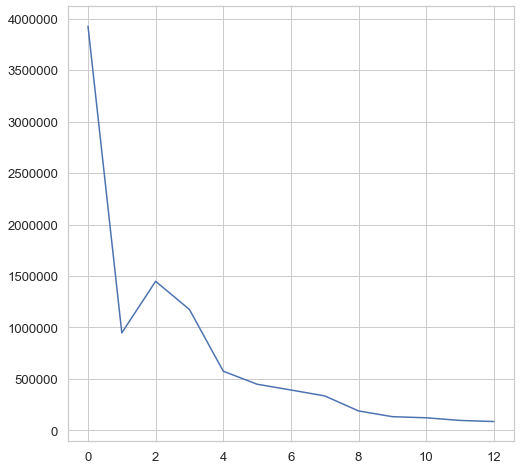

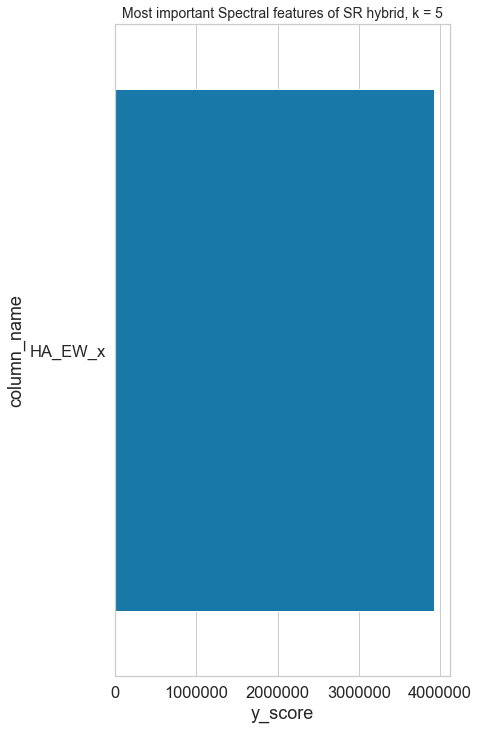

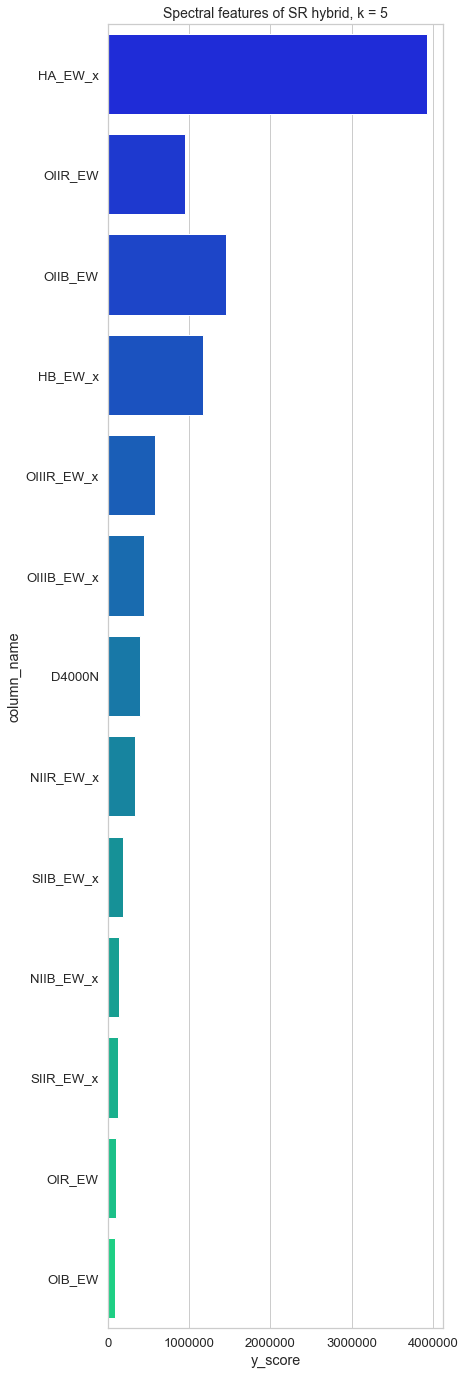

New SR file requested
Failed to find Hybrid results, or remake requested
Settings: Database: Combined, k = 5,
succes, Laplacian results found
settings: Dataset = eta, Dataframe = Combined, filtered by EIF = 1288 
feature number: 1, y= 9461891.78
feature number: 2, y= 1517716.69
feature number: 3, y= 1791078.31
feature number: 4, y= 2198353.57
feature number: 5, y= 2501836.43
feature number: 6, y= 2578962.19
feature number: 7, y= 2927096.21
feature number: 8, y= 2060409.74
feature number: 9, y= 2047972.13
feature number: 10, y= 2130237.35
feature number: 11, y= 2267971.70
feature number: 12, y= 2523066.12
feature number: 13, y= 2816963.18
feature number: 14, y= 2864918.76
feature number: 15, y= 3074159.84
feature number: 16, y= 3377978.58
feature number: 17, y= 3497067.10
feature number: 18, y= 3684619.35
feature number: 19, y= 3998659.26
feature number: 20, y= 4068666.23
feature number: 21, y= 4105236.53
feature number: 22, y= 4363244.13
feature number: 23, y= 4674568.09
feature number

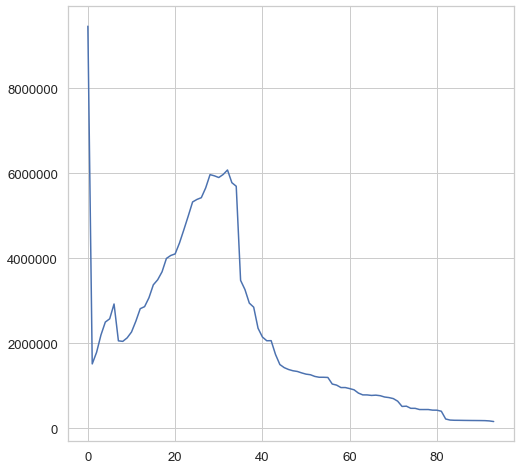

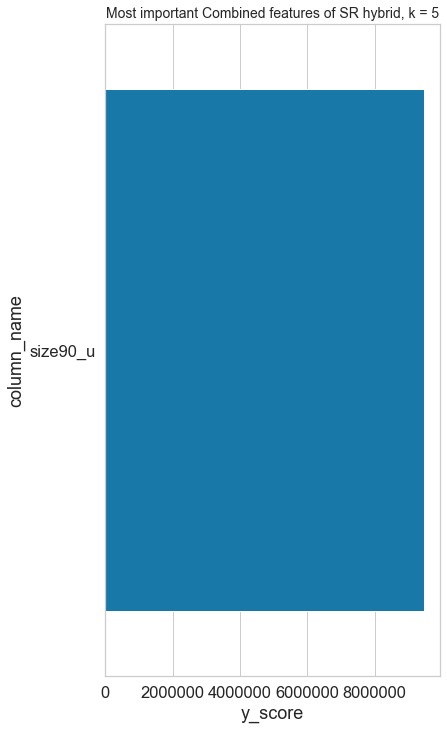

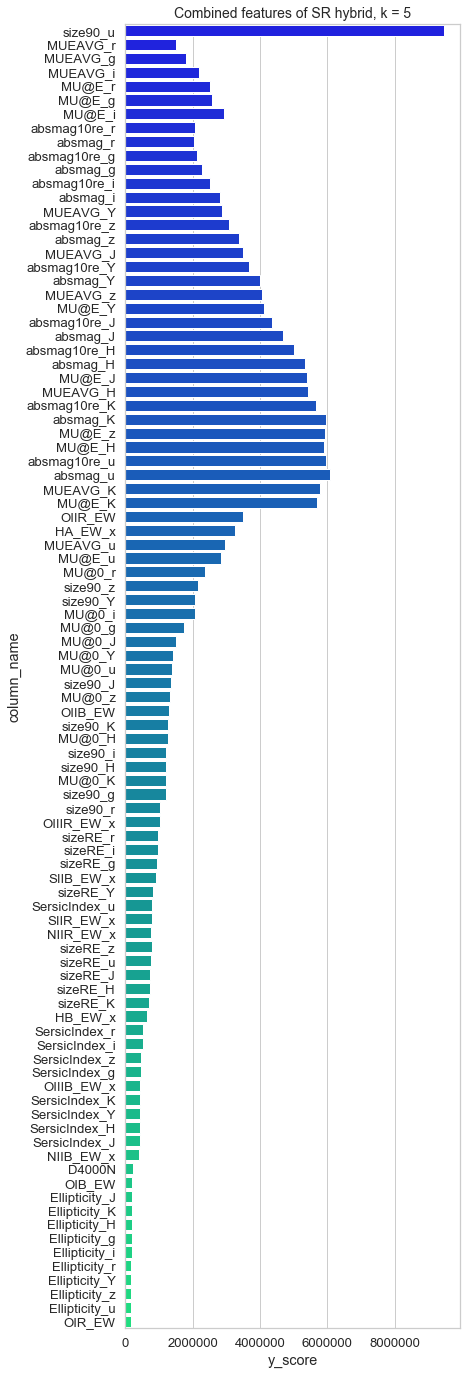

(  column_name    y_score
 0    size90_u  9461892.0,
       column_name       y_score
 0        size90_u  9.461892e+06
 1        MUEAVG_r  1.517717e+06
 2        MUEAVG_g  1.791078e+06
 3        MUEAVG_i  2.198354e+06
 4          MU@E_r  2.501836e+06
 ..            ...           ...
 89  Ellipticity_r  1.858628e+05
 90  Ellipticity_Y  1.848704e+05
 91  Ellipticity_z  1.833312e+05
 92  Ellipticity_u  1.767189e+05
 93         OIR_EW  1.623344e+05
 
 [94 rows x 2 columns])

In [36]:
remake = True
plot_SR(spec_eif,5, remake=remake)
plot_SR(combi_eif,5, remake = remake)

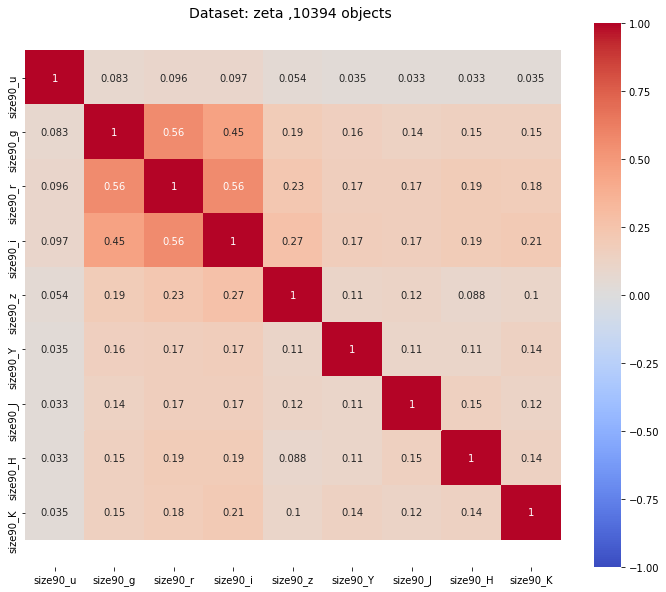

In [15]:
cormat(contains(combi_eif,'size90_'),True)

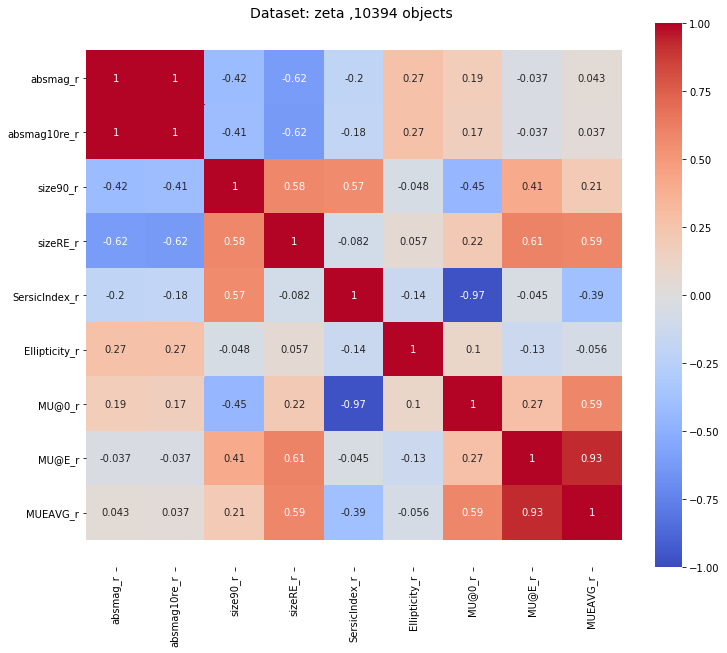

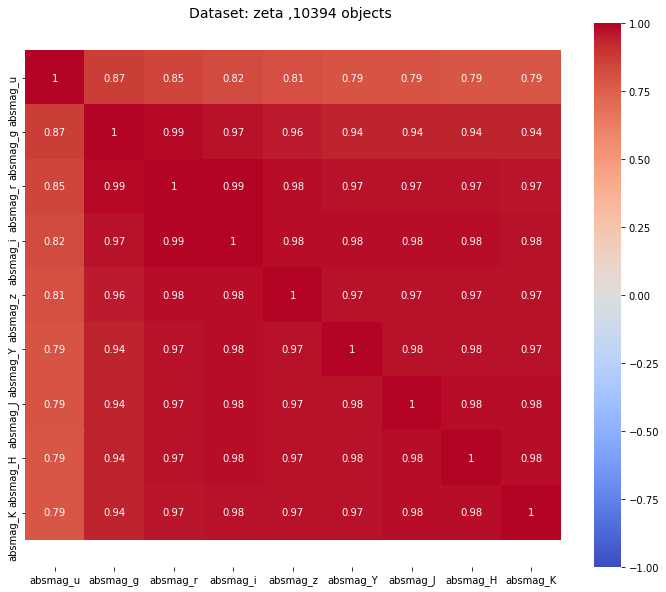

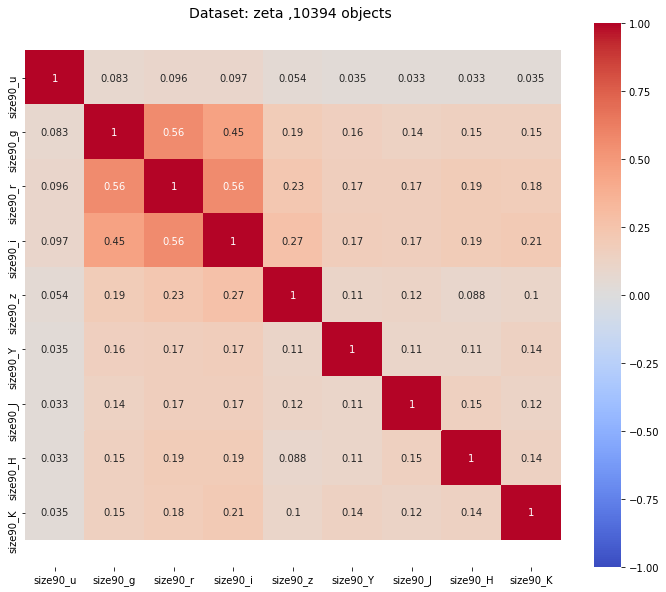

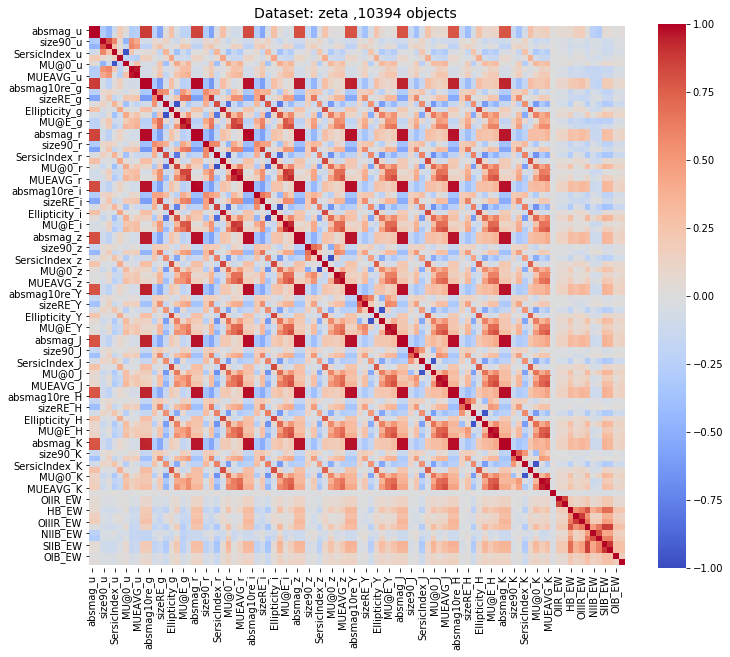

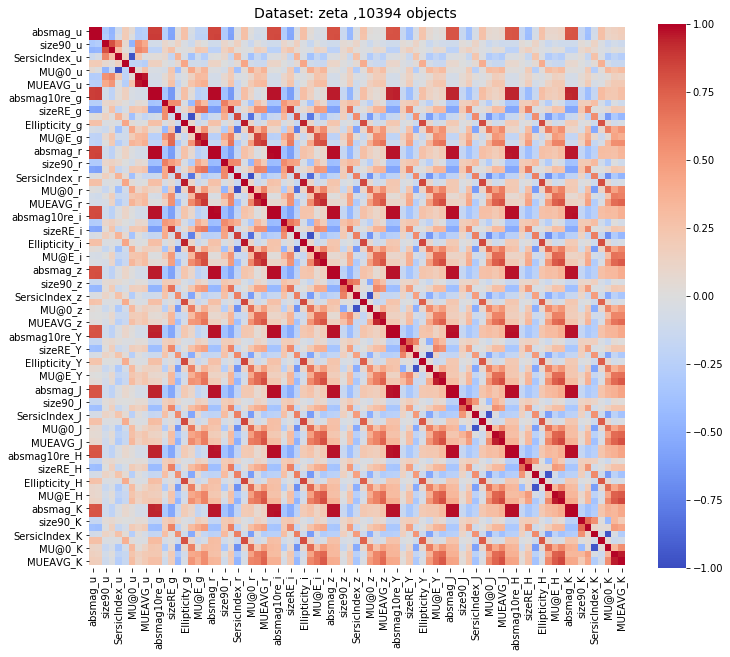

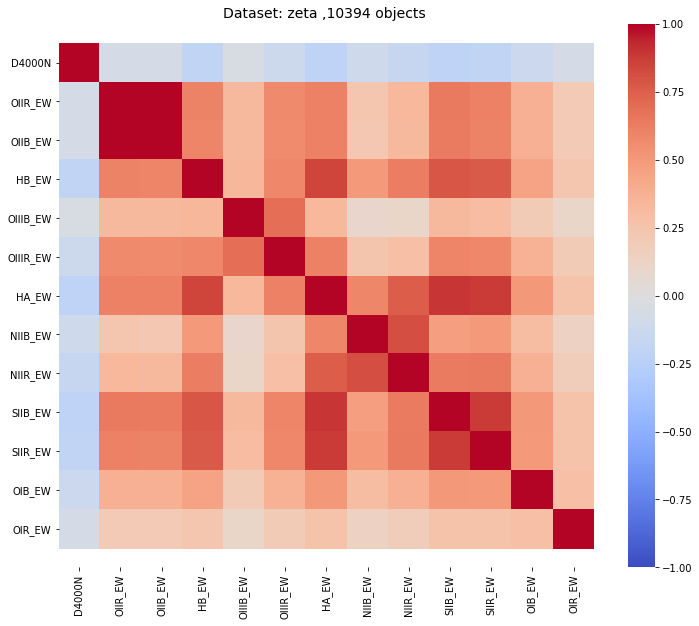

In [16]:
teller = 0
cormat(endswith(phot_eif,'r'),True)
cormat(contains(combi_eif,'absmag_'),True)
cormat(contains(combi_eif,'size90_'),True)
cormat(combi_eif)
cormat(phot_eif)
cormat(spec_eif)

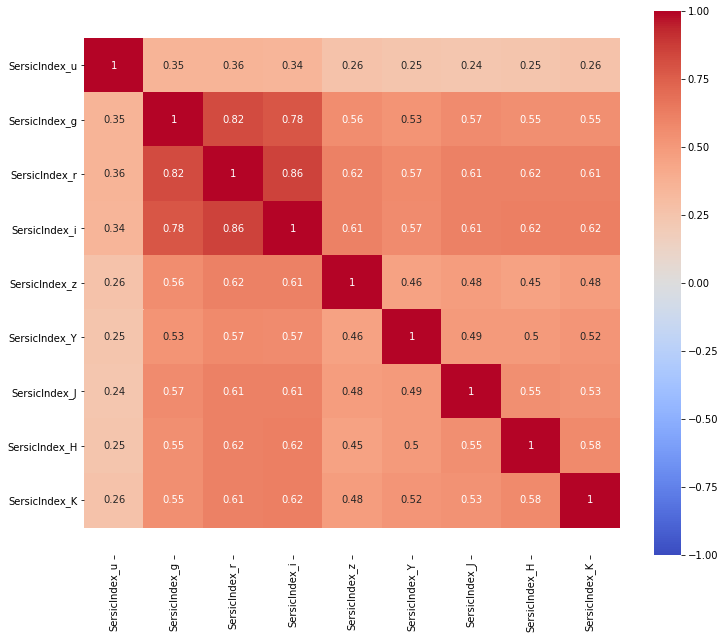

In [13]:
cormat(contains(phot_eif,'SersicIndex'),True)

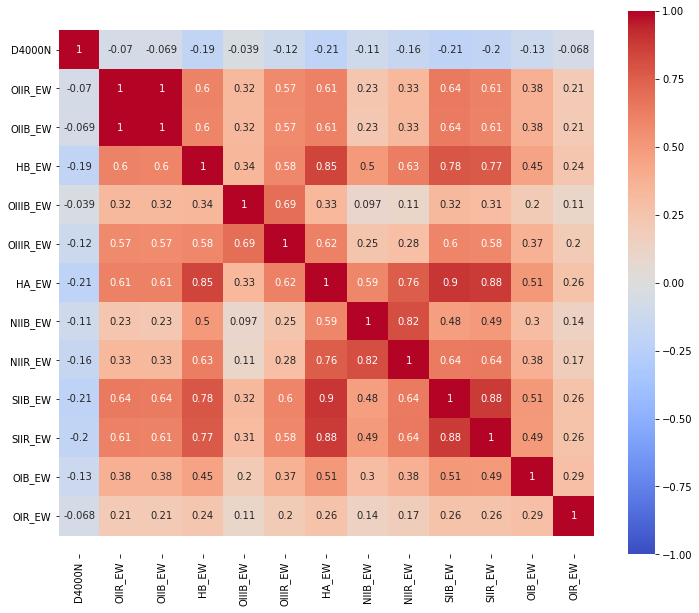

In [7]:
cormat(spec_eif, True)

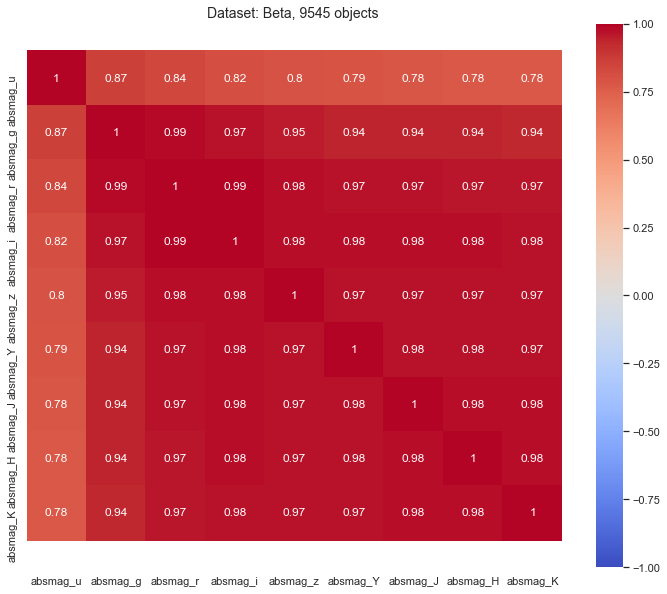

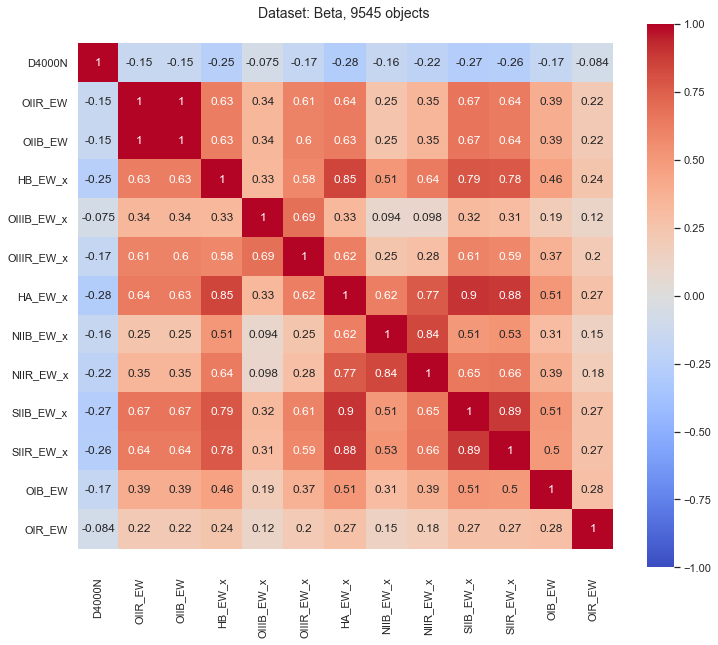

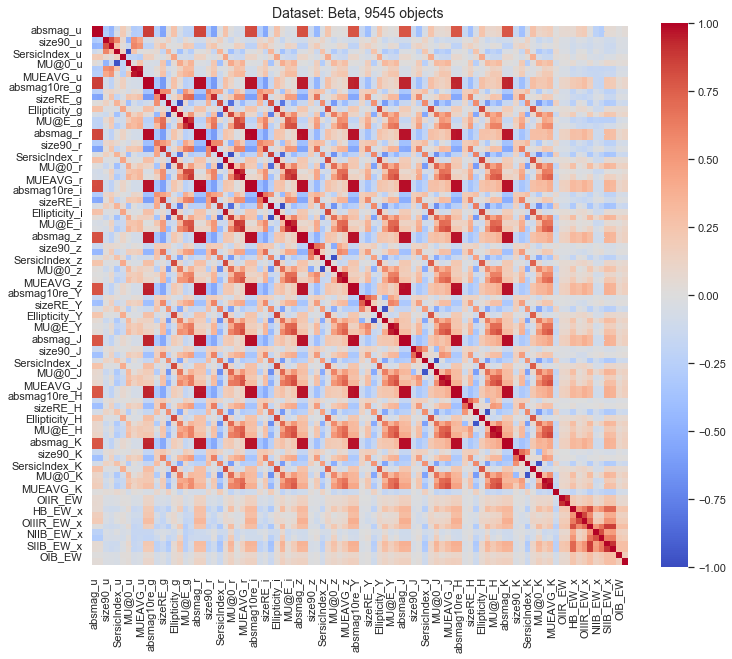

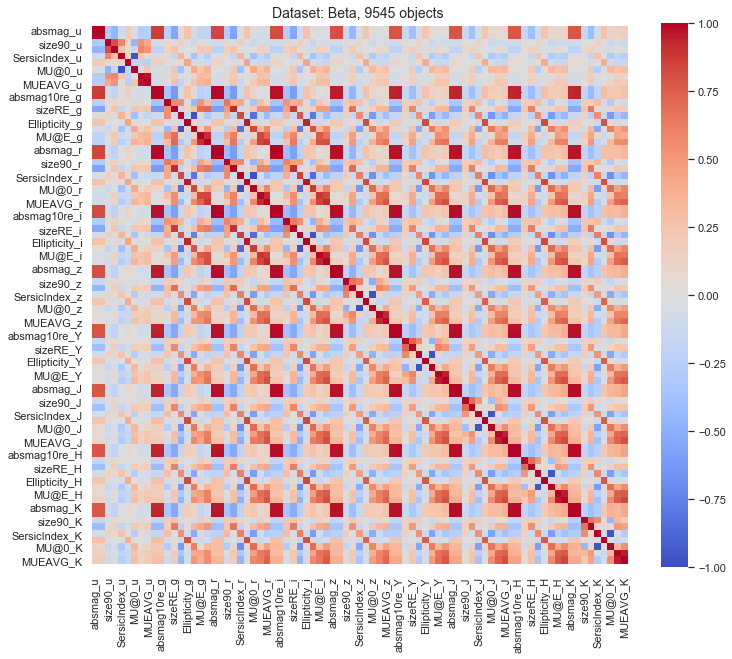

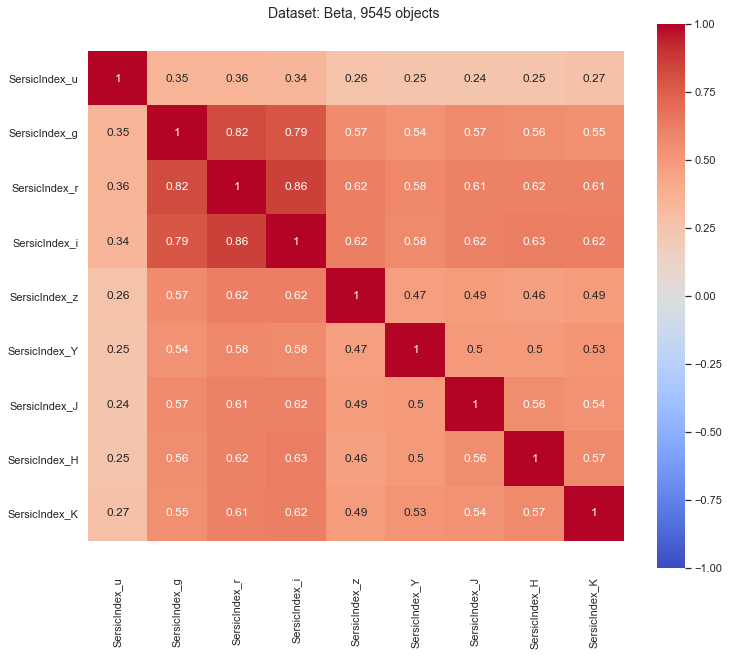

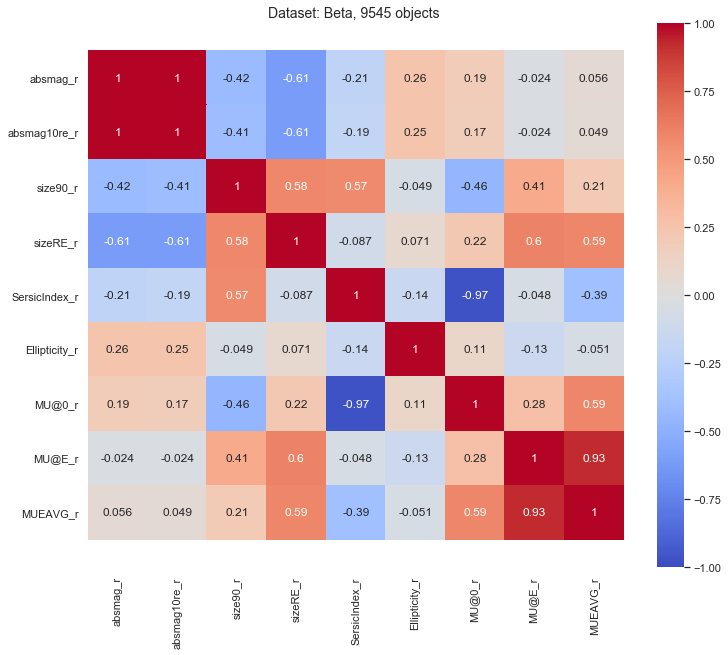

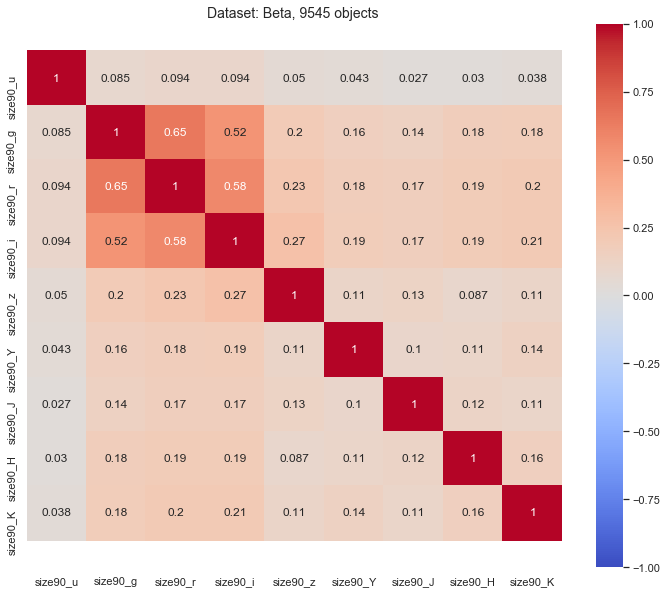

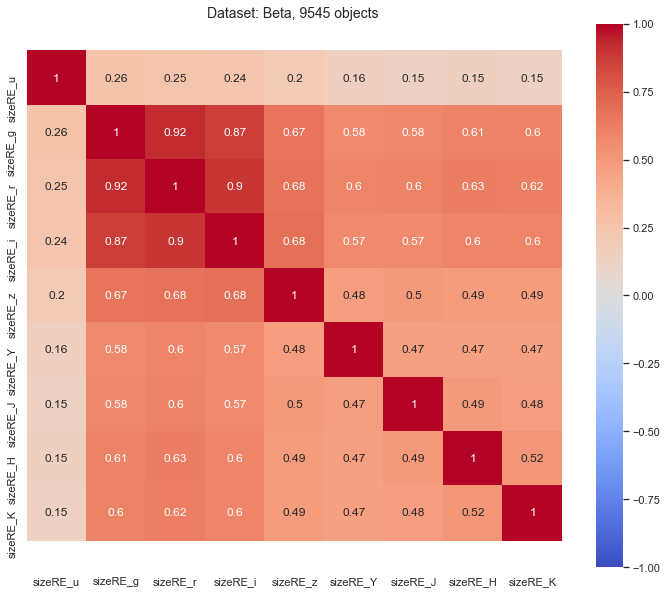

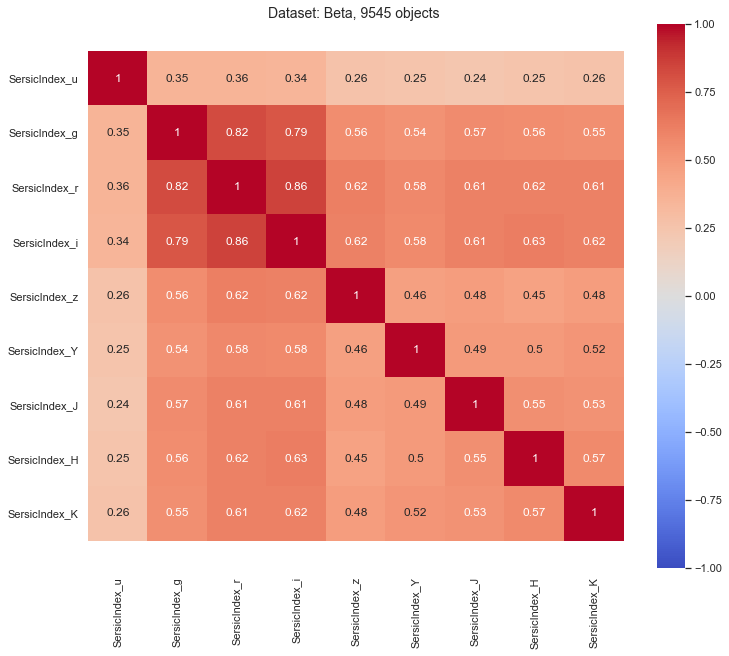

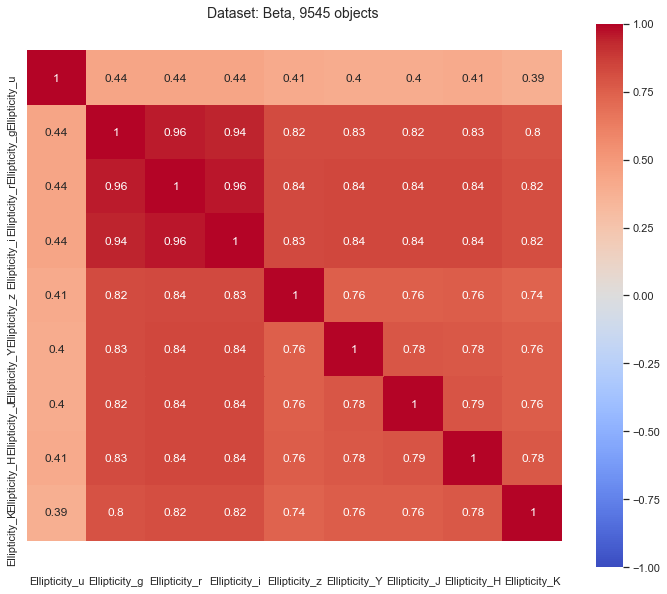

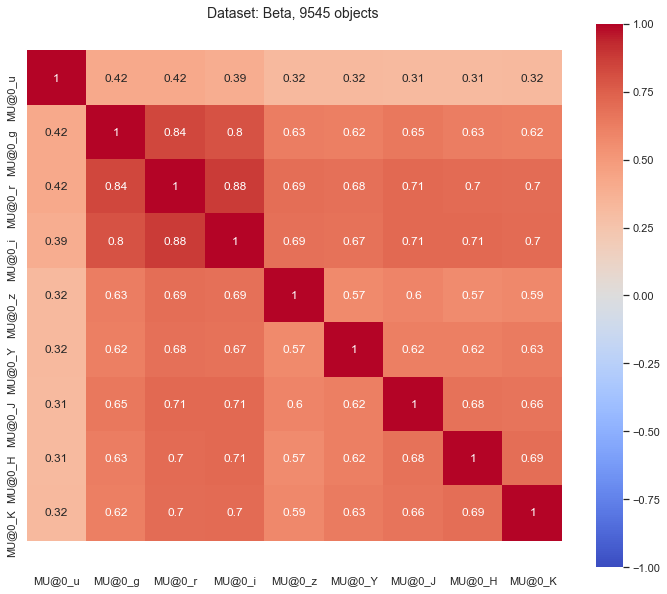

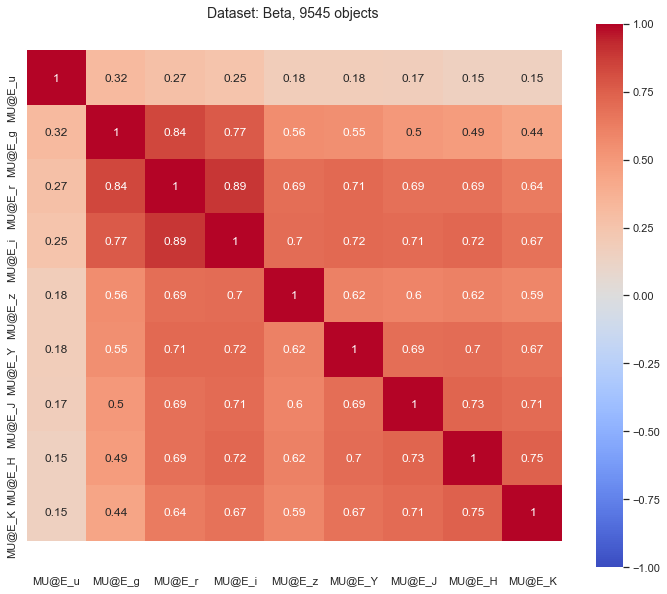

F:\Anaconda3\lib\site-packages\seaborn\matrix.py:280: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
F:\Anaconda3\lib\site-packages\seaborn\matrix.py:280: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


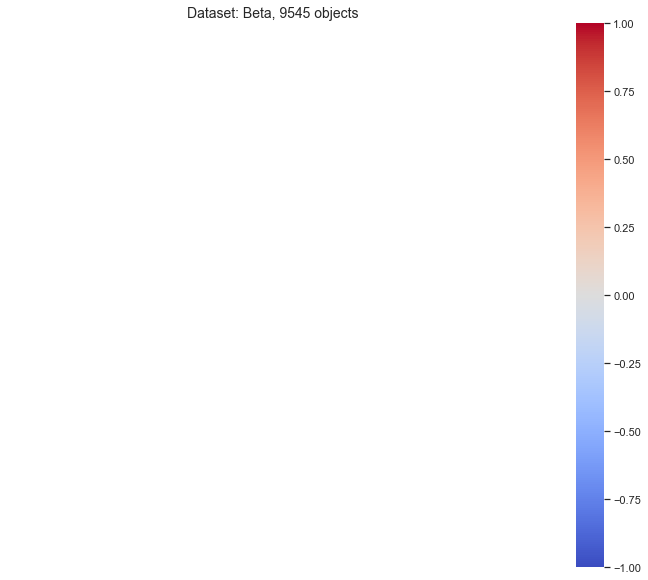

In [16]:
dataset = "Beta"
def cormat(dataframe,annotstate=False):
    global teller
    corrmat = dataframe.corr()
    #top_corr_features = corrmat.index
    plt.figure(figsize=(12,10))
    #plot heat map
    sns.heatmap(corrmat,annot=annotstate, vmin = -1, vmax = 1, center = 0, cmap='coolwarm')
    b, t = plt.ylim() # discover the values for bottom and top
    b += 0.5 # Add 0.5 to the bottom
    t -= 0.5 # Subtract 0.5 from the top
    plt.ylim(b, t) # update the ylim(bottom, top) values
    plt.title("Dataset: %s, %i objects "%(dataset, dataframe.shape[0]),size=14)
    plt.savefig("pics/cormat_%s_%i"%(dataset,teller),bbox_inches="tight")
    teller += 1
    plt.show() 

teller = 0
cormat(contains(combi_eif,'absmag_'),True)
cormat(spec_eif,True)
#cormat(ds_eif)
cormat(combi_eif)
cormat(phot_eif)
cormat(contains(phot_eif,'SersicIndex'),True)
cormat(endswith(phot_eif,'r'),True)


cormat(contains(combi_eif,'size90_'),True)
cormat(contains(combi_eif,'sizeRE_'),True)
cormat(contains(combi_eif,'Sersic'),True)
cormat(contains(combi_eif,'Ellipticity_'),True)
cormat(contains(combi_eif,'MU@0'),True)
cormat(contains(combi_eif,'MU@E'),True)
cormat(contains(combi_eif,'MUAVG'),True)

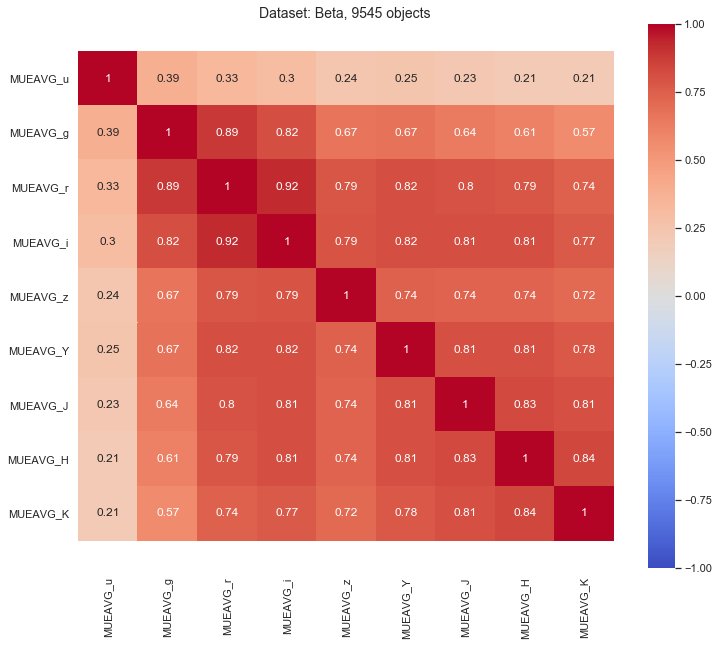

In [17]:
cormat(contains(combi_eif,'MUEAVG'),True)

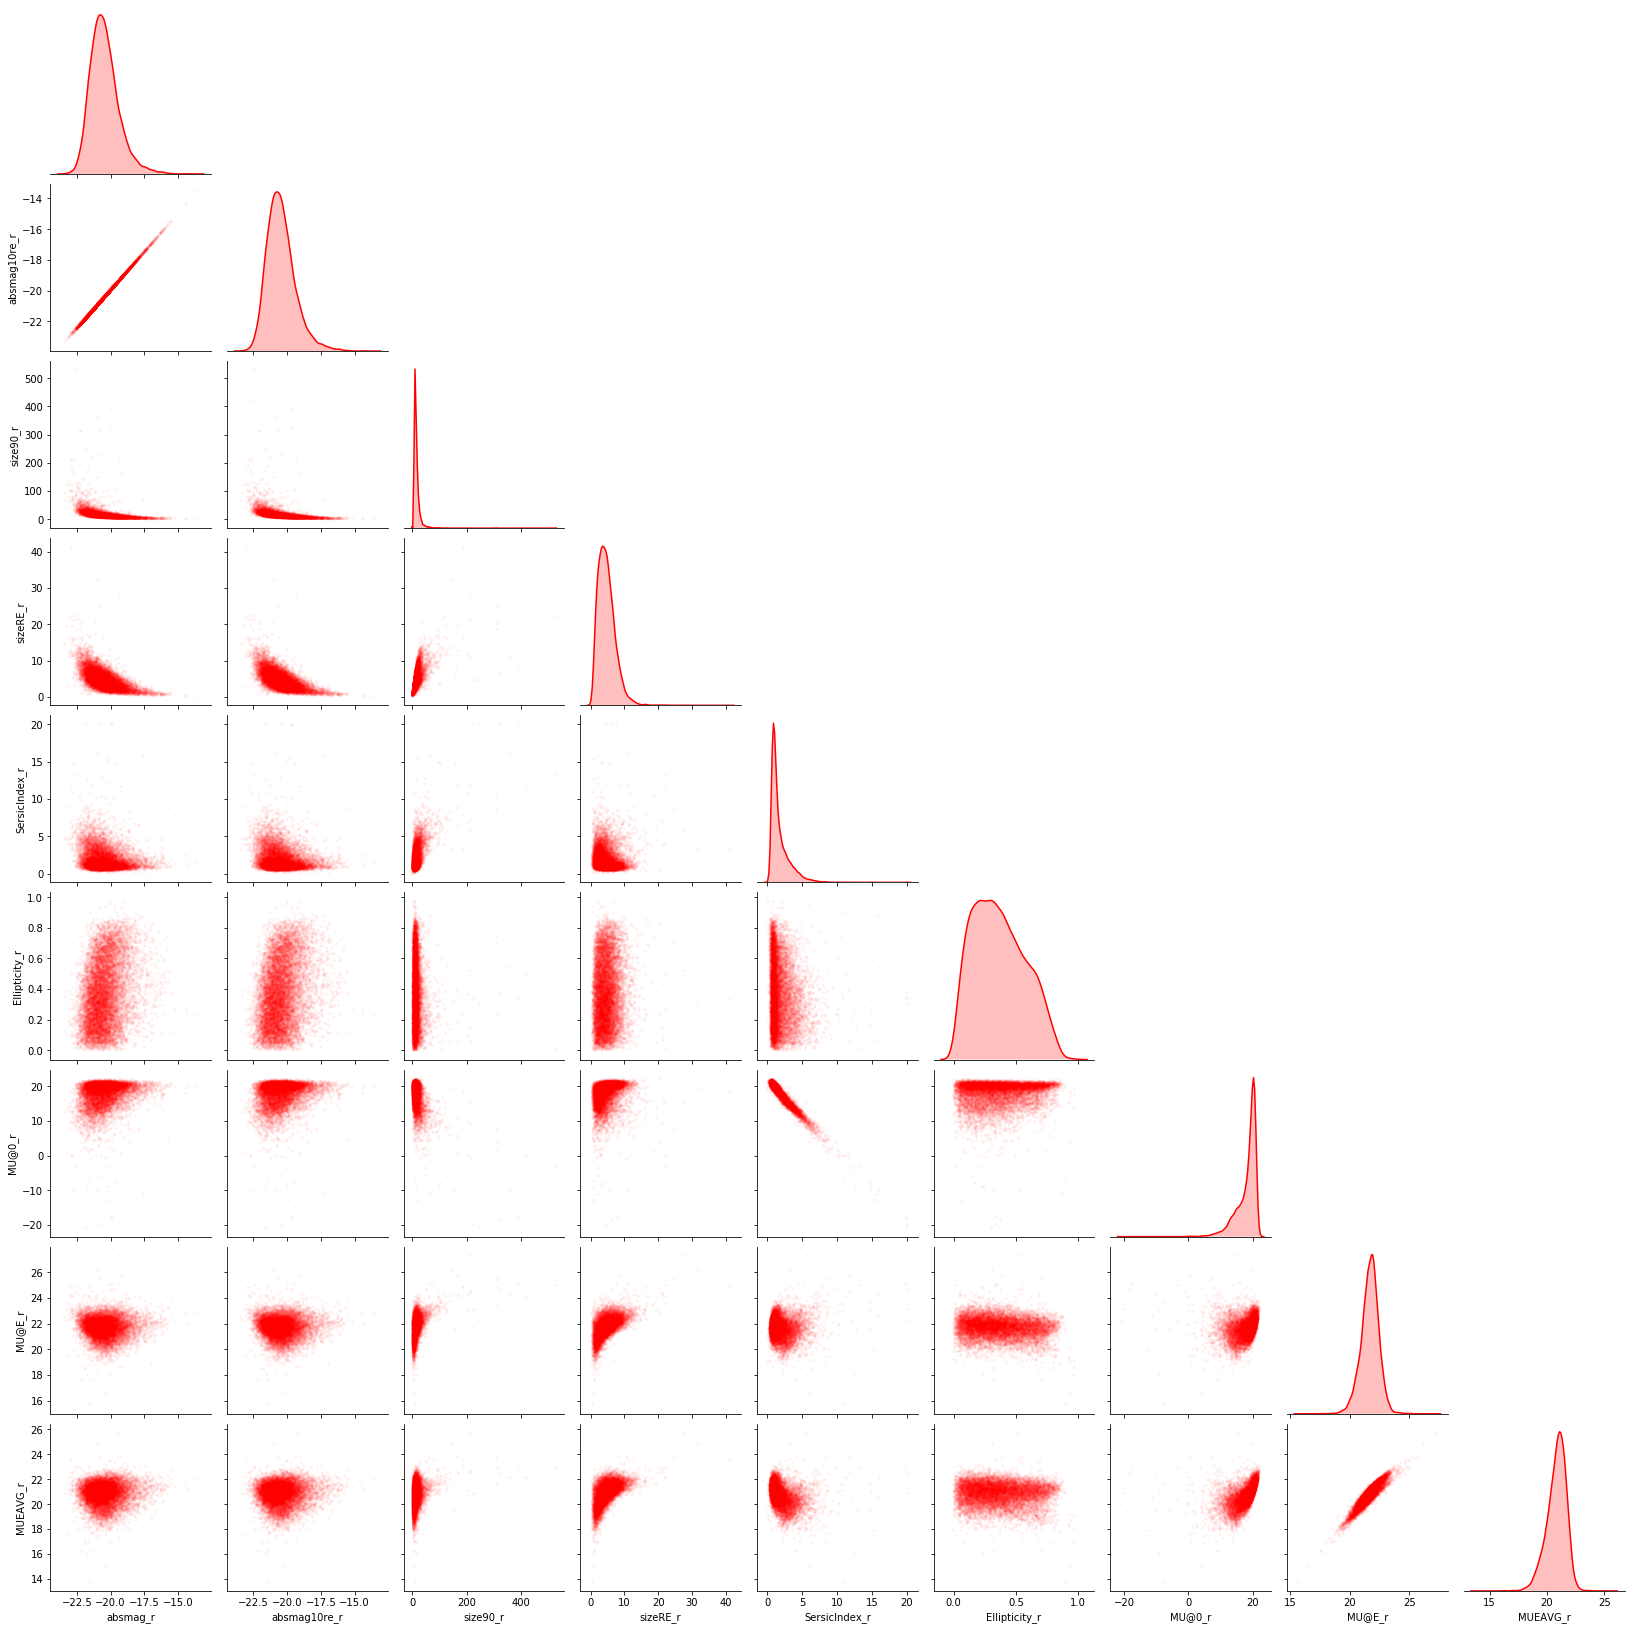

In [20]:
r_eif = endswith(phot_eif,'r')

sns.pairplot(r_eif, corner = True,plot_kws=dict(s=10, edgecolor="None", linewidth=1,\
                                                alpha = 0.05,color='red'),
                 diag_kind="kde", diag_kws=dict(shade=True,color='red'))
plt.savefig("pics/pairwise_r_eif",bbox_inches="tight")

KeyboardInterrupt: 

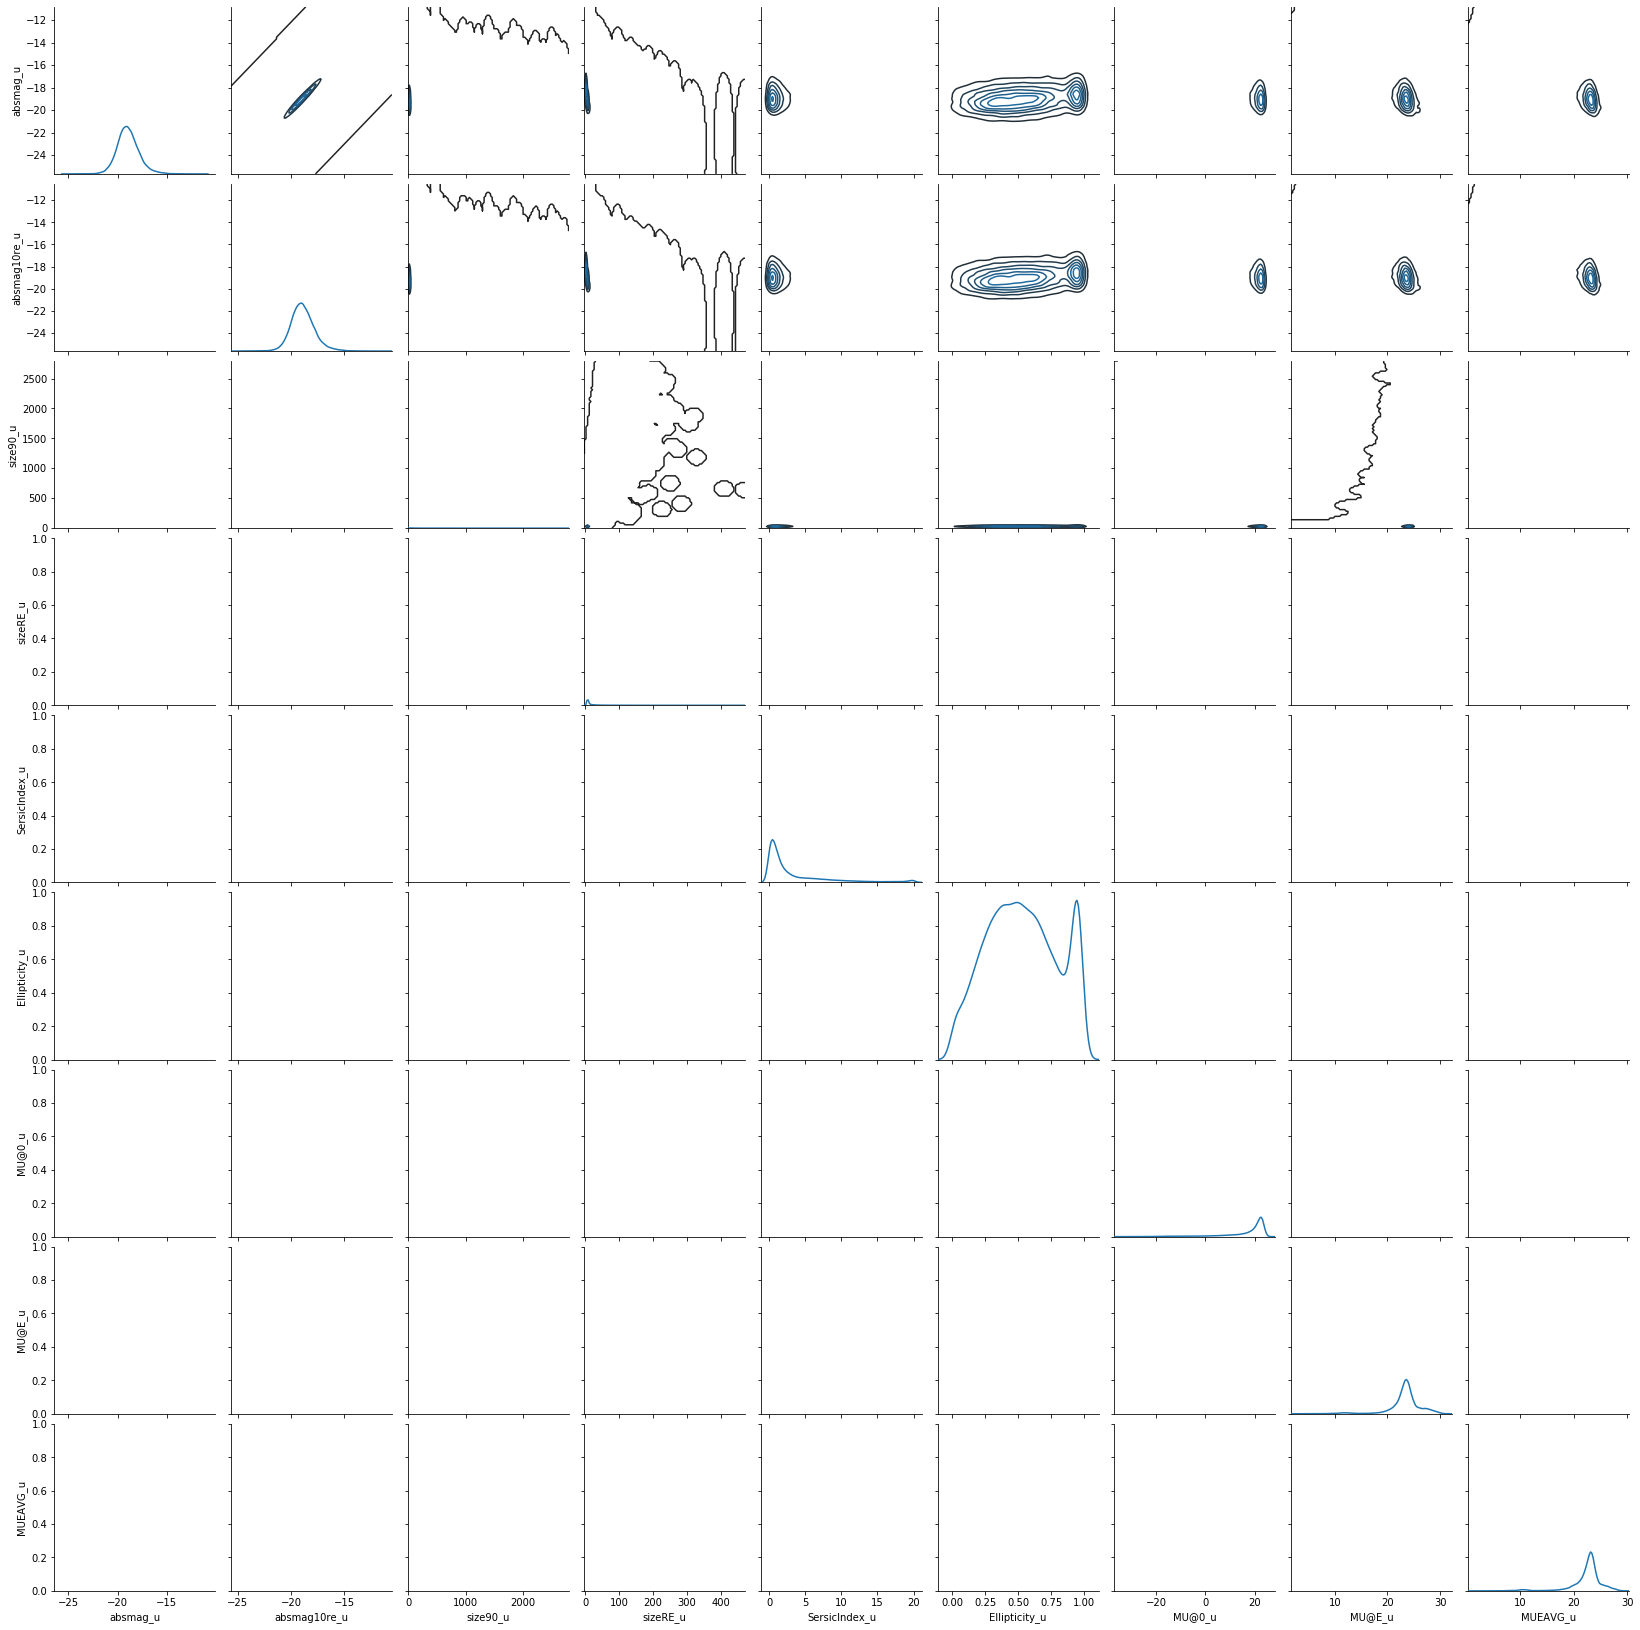

In [8]:
g = sns.PairGrid(r_eif)
g.map_diag(sns.kdeplot)
g.map_upper(sns.kdeplot, n_levels=6)
g.map_lower(sns.scatterplot, edgecolor=None, s=10, alpha = 0.3)

In [1]:
def plot_col(df, col, color='blue'):
    c_df =  endswith(df,col)
    c_df.name = '%s_df'%(col)
    c_eif = eif_isolation(r_df, dropped = dropped, remake = remake)
    c_eif.name = 'r_eif'

    sns.pairplot(c_eif, corner = True,plot_kws=dict(s=5, edgecolor="None", linewidth=1,color='red'),
                     diag_kind="kde", diag_kws=dict(shade=True,color='red'))
    plt.savefig("pics/pairwise_r_eif",bbox_inches="tight")
    plt.show()
plot_col(phot, 'g')

NameError: name 'phot' is not defined

In [2]:
def cluster_plot(eif_df, k):       
    kmeans = KMeans(n_clusters= k).fit(eif_df)  # set up a KMeans object, 
    cluster_predict = kmeans.predict(eif_df)          
    eif_df['predict'] = cluster_predict
    
    sns.set_style('darkgrid')
    title = ("KMeans comparison for critical features, k = %i"%(k) )
    sns.pairplot(inv_eif, corner = True,plot_kws=dict(s=10, edgecolor="None", linewidth=1),
                 diag_kind="kde", diag_kws=dict(shade=True),hue="predict")
    plt.savefig("pics/pairwise_kmeans_%ik%s"%(k,eif_df.name),bbox_inches="tight")
    plt.show()
cluster_plot(inv_eif,3)

NameError: name 'inv_eif' is not defined

In [21]:
cormat(u_eif,"u_eif",True)

TypeError: cormat() takes from 1 to 2 positional arguments but 3 were given

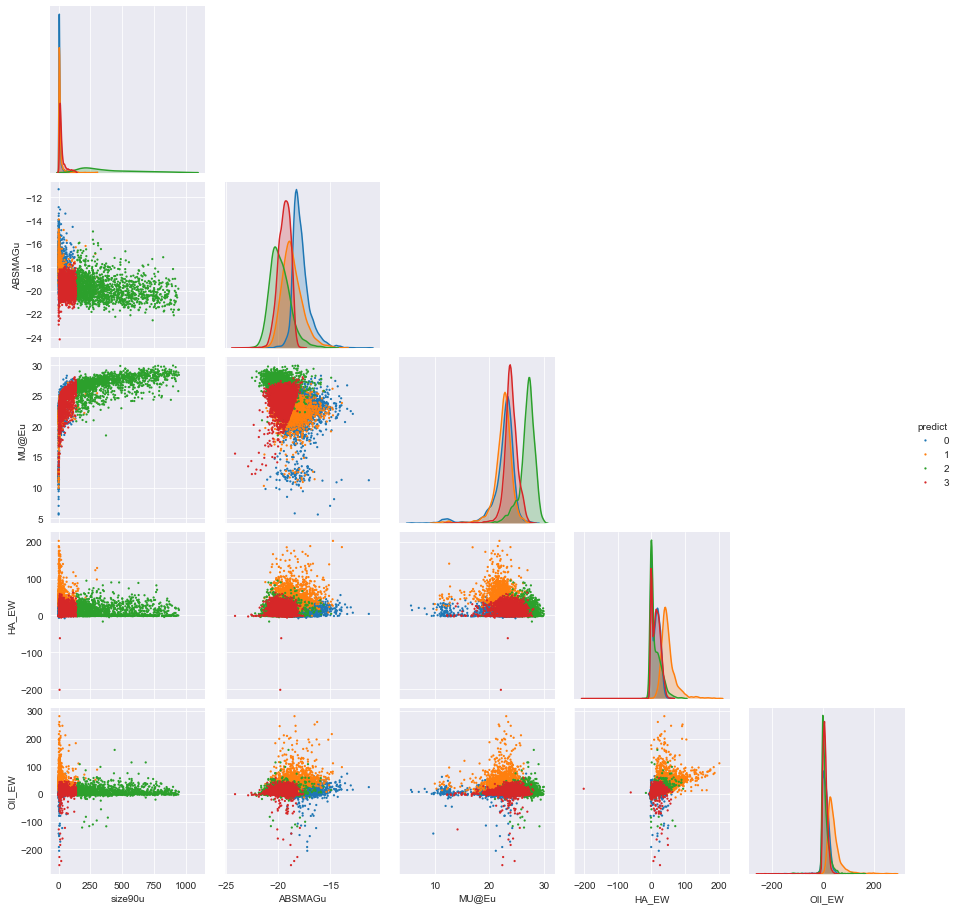

In [116]:
from sklearn.preprocessing import StandardScaler
def cluster_plot_scaled(eif_df, k):       
    scaler = StandardScaler()
    scaled = pd.DataFrame(scaler.fit_transform(eif_df),index=eif_df.index,columns=eif_df.columns)

    kmeans = KMeans(n_clusters= k).fit(scaled)  # set up a KMeans object, 
    cluster_predict = kmeans.predict(scaled)          
    eif_df['predict'] = cluster_predict
    
    sns.set_style('darkgrid')
    title = ("KMeans comparison for critical features, k = %i"%(k) )
    sns.pairplot(inv_eif, corner = True,plot_kws=dict(s=5, edgecolor="None", linewidth=1),
                 diag_kind="kde", diag_kws=dict(shade=True),hue="predict")
    plt.savefig("pics/pairwise_kmeans_scaled_%ik%s"%(k,eif_df.name),bbox_inches="tight")
    plt.show()
cluster_plot_scaled(inv_eif, 4)

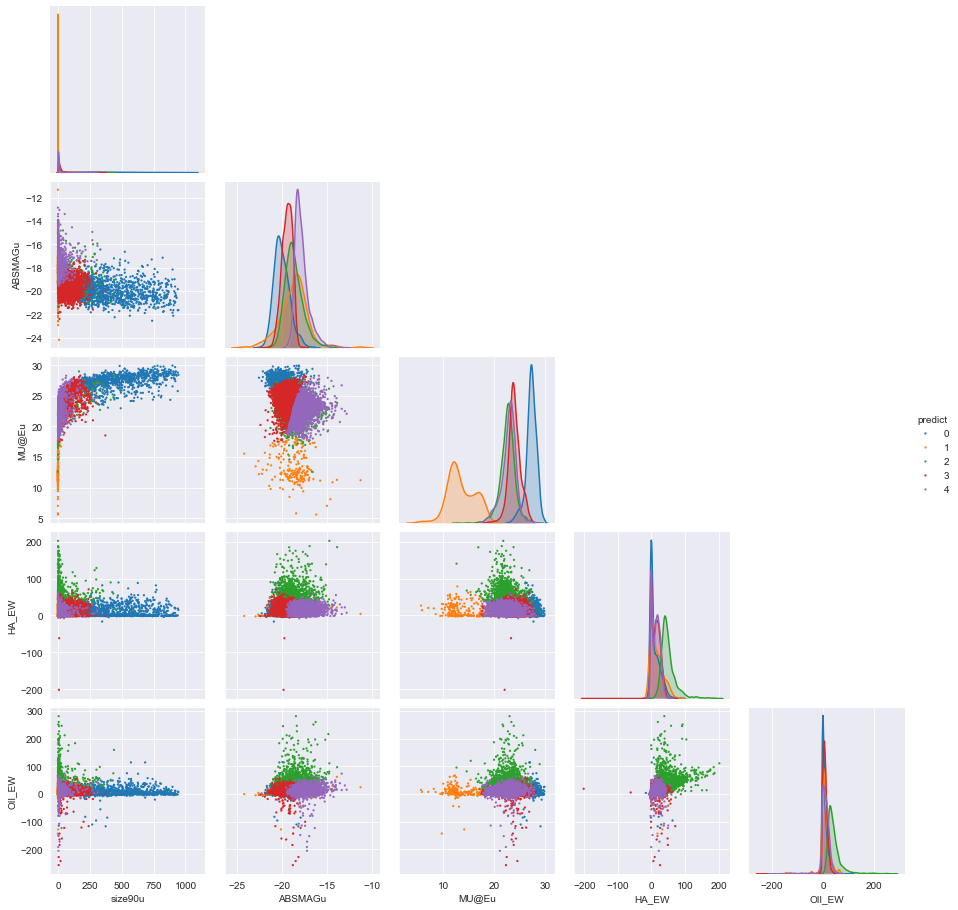

In [117]:
cluster_plot_scaled(inv_eif, 5)

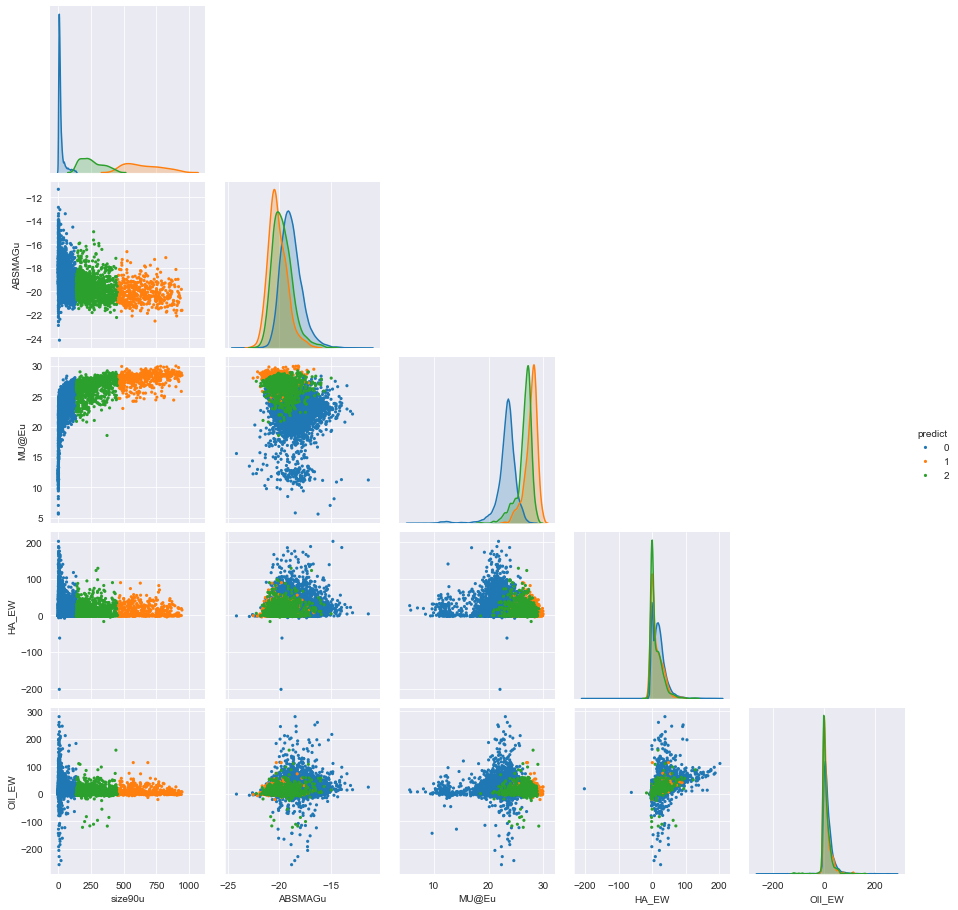

In [103]:

cluster_plot(inv_eif, 3)

In [ ]:
k_list

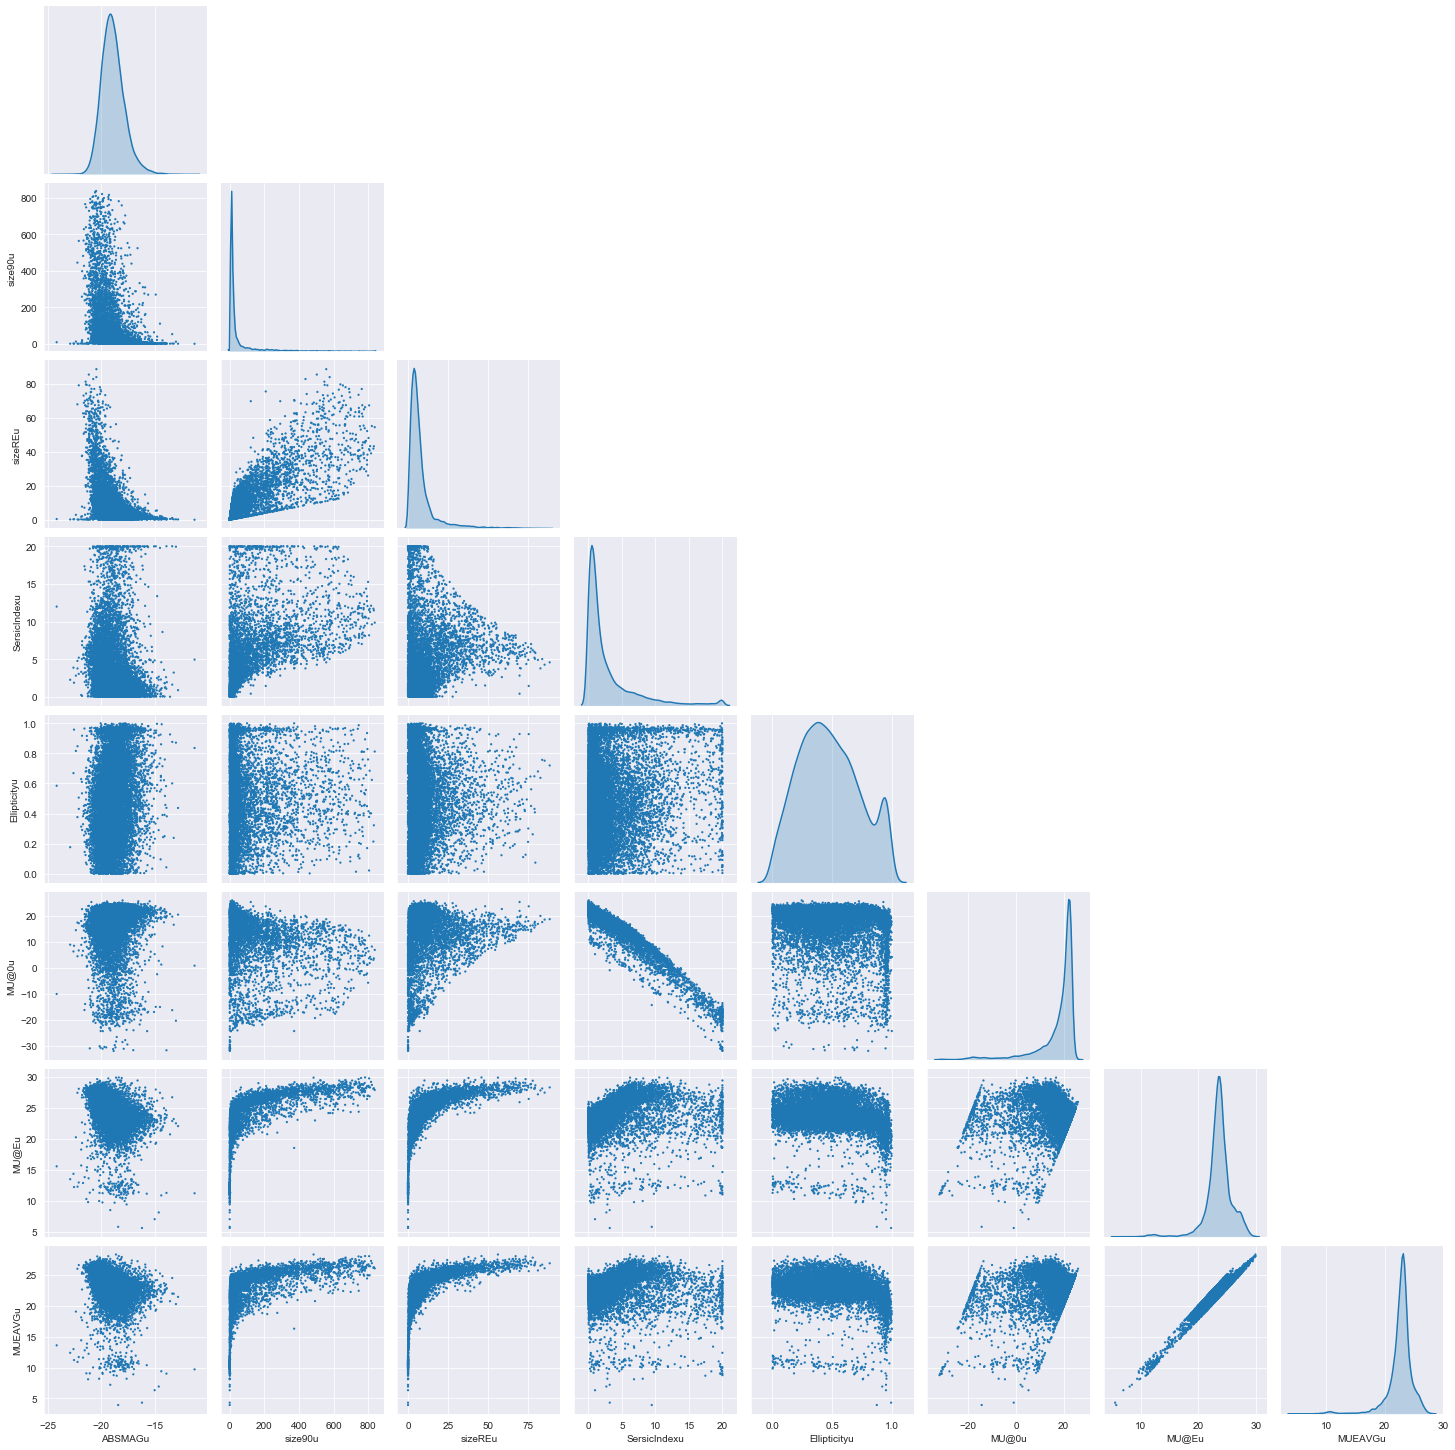

In [115]:
sns.pairplot(u_eif, corner = True,plot_kws=dict(s=5, edgecolor="None", linewidth=1),
                 diag_kind="kde", diag_kws=dict(shade=True))
plt.savefig("pics/pairwise_u_eif",bbox_inches="tight")

succes, EIF sorted matrix found
settings: Dataframe = r_df, number dropped = 689, number of trees = 500, samplesize = 512


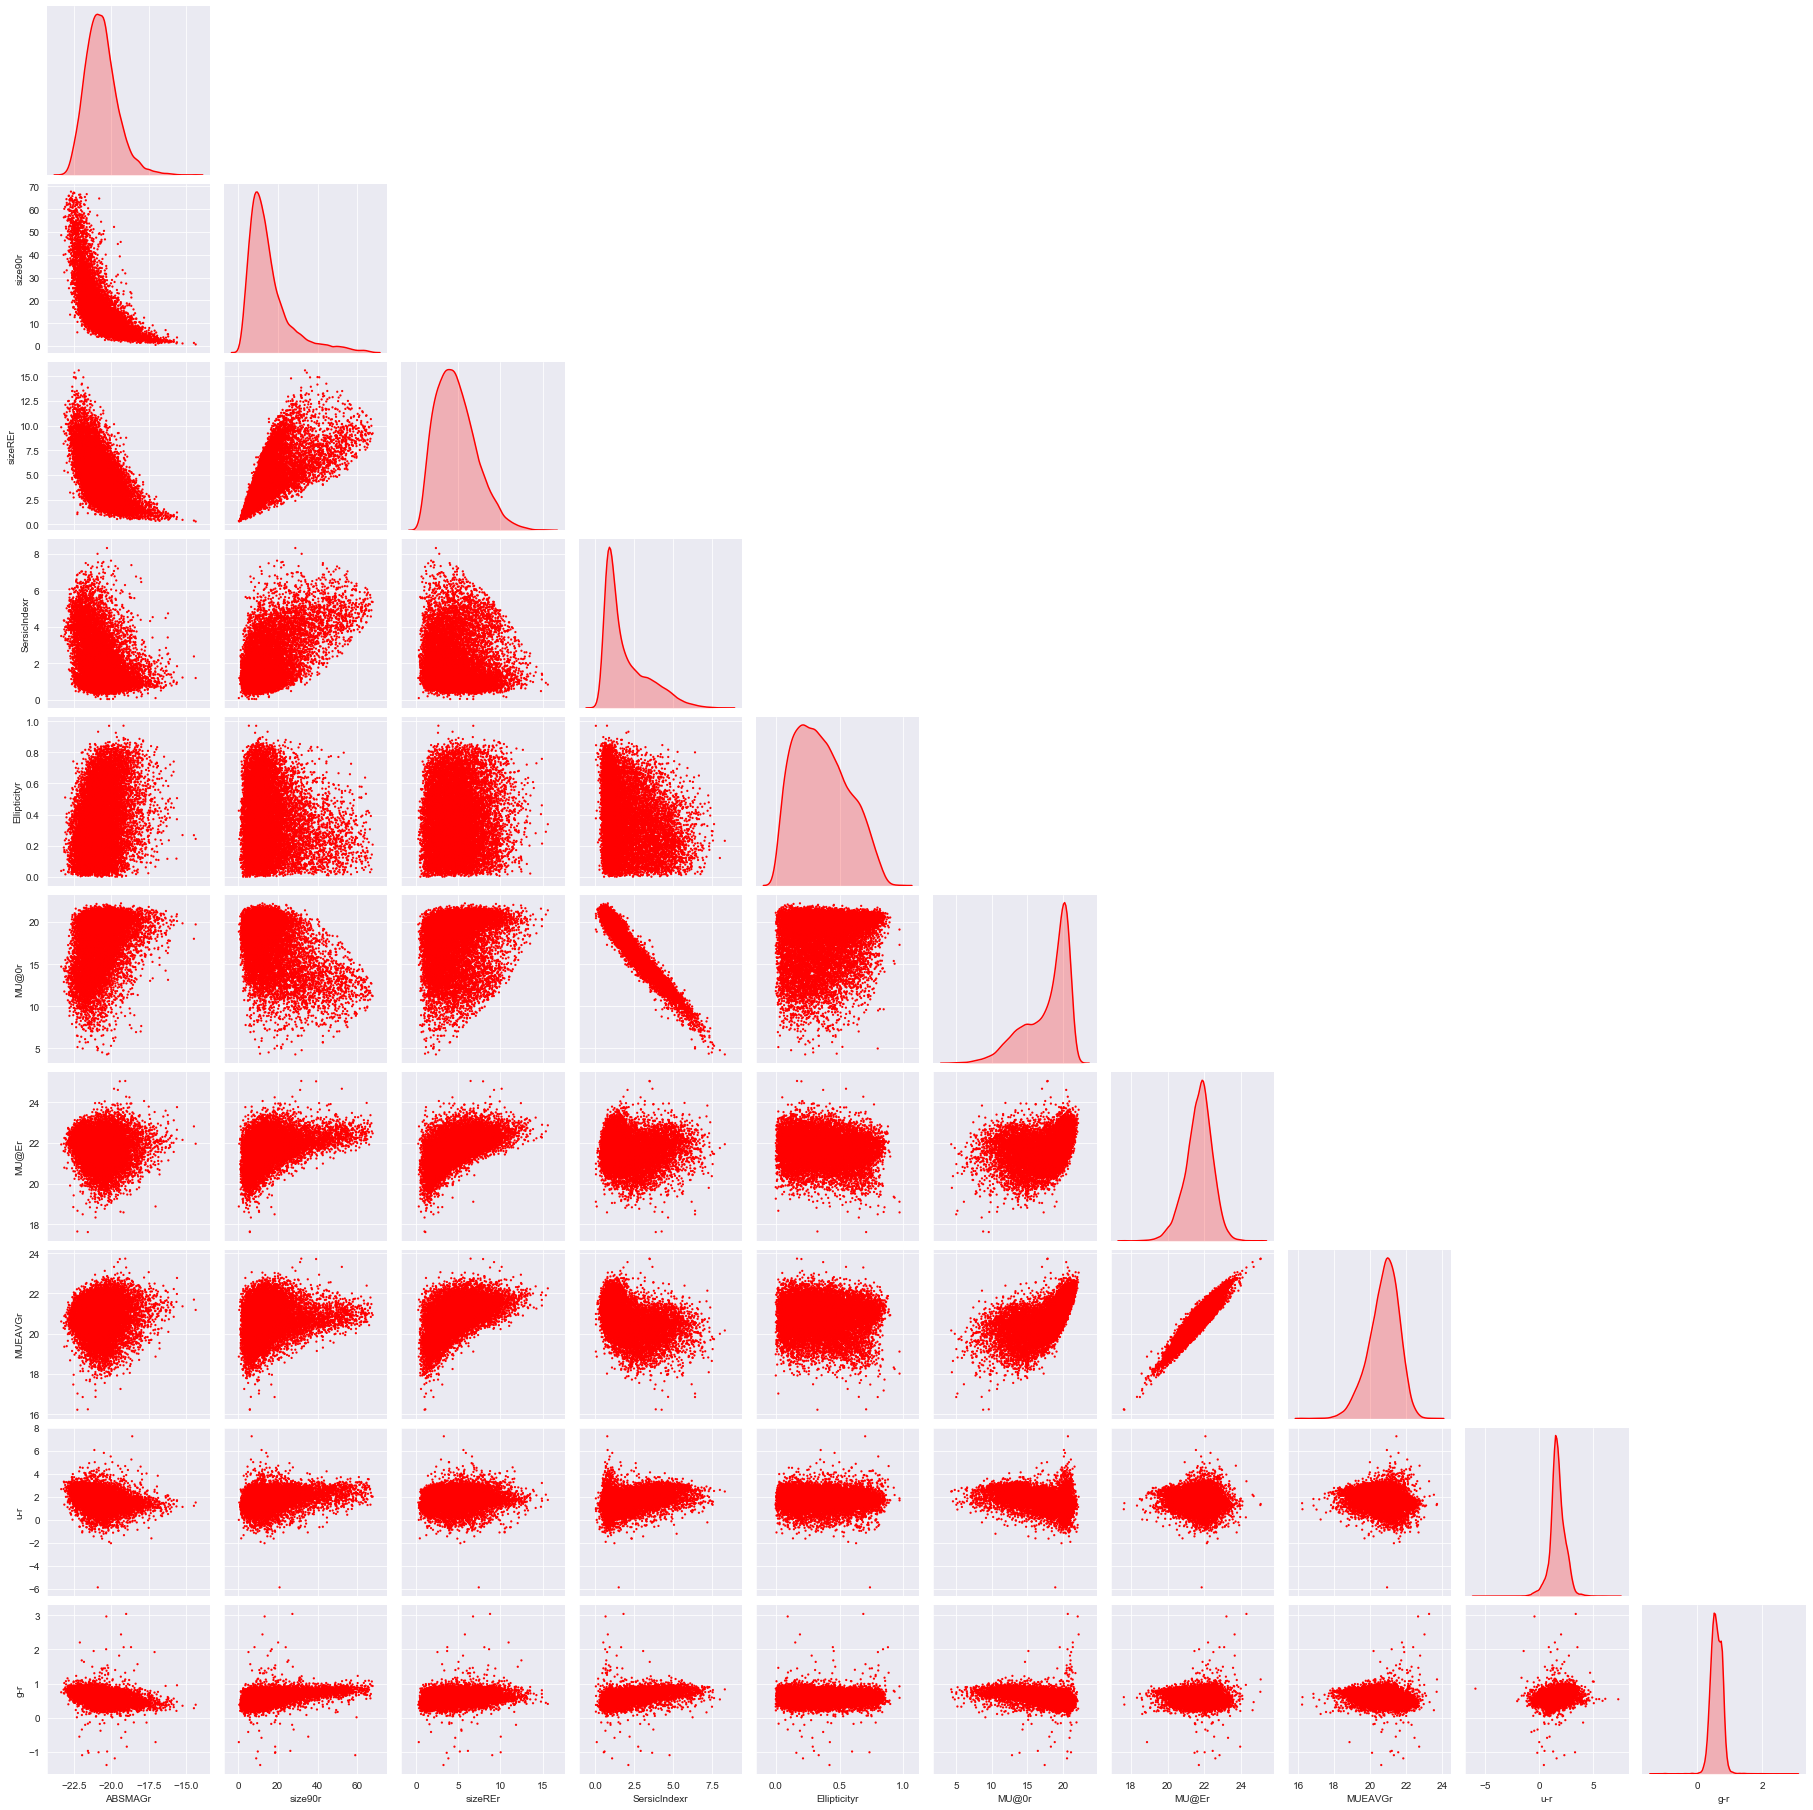

In [114]:

r_df =  full[full.columns[full.columns.str.endswith('r')]]
r_df.name = 'r_df'
r_eif = eif_isolation(r_df, dropped = dropped, remake = remake)
r_eif.name = 'r_eif'


sns.pairplot(r_eif, corner = True,plot_kws=dict(s=5, edgecolor="None", linewidth=1,color='red'),
                 diag_kind="kde", diag_kws=dict(shade=True,color='red'))
plt.savefig("pics/pairwise_r_eif",bbox_inches="tight")

In [19]:
def WNCH(X, cluster_predict, n_clusters,  L_r,):
    """
    Weighted Normalised Calinski-Harabasz Index
    input: 
    X = pandas dataframe, shape: (n_samples , n_features). Each is a single data point
    Will assume lap_part if none is given
    lables = an array, shaped to (n_samples), predicting the label for each sample
    Will assume cluster_predict if none is given
    
    Returns:
    score as a float
    possible adjustment proposed:First number explodes so start n_features at 0 rather then 1.
    This means the graph always starts at 0
    """
    
    n_features = X.shape[1]
    n_samples = X.shape[0]    #the sample size, or n
    
    extra_disp = 0.
    intra_disp = 0.
    
    mean = np.mean(X, axis=0).values # mean of the whole partial matrix, per feature


    for k in range(n_clusters):
        cluster_k = X[cluster_predict == k].values   # a matrix with just objects belonging to this cluster
        mean_k = np.mean(cluster_k, axis=0)                 # the mean vector for every feature
        extra_disp += len(cluster_k) * np.sum((mean_k - mean) ** 2)  #add to the trace of S_B (non diagonal cancel out)
        intra_disp += np.sum((cluster_k - mean_k) ** 2)              #add to the trace of S_W (non diagonal cancel out)
    
    y =  (extra_disp * (n_samples - n_clusters) * n_features) / (intra_disp * (n_clusters - 1) * L_r )
    #print('y =',y)

    if intra_disp == 0.:
        return 1
    if n_features == 1:
        return y / 4
    else:
        return y
    


y_list = []
rank_list = []
def LS_WNCH_BE(eif_df, k = 3, p = 30):
    
    """
    Laplacian Score-WNCH-Backward Elimination
    ======================================
    Input:
    DF_name: Name of the dataframe, one of four possible right now, this is an F * N matrix
    F = number of features, N = number of datapoints)
    dropped: amount of data to be filtered with EIF
    k: the value of k for the k-means clustering test
    remake: Wether or not to remake the laplacian order matrix (memory intensive)
    
    ======================================
    Output: 
    
    ===============================================================
    Description:
    First hybrid method
    Builds n feature subsets (as many as featur)
    
    =================================================================
    
    
    Based on Solario-Fernandez et al, 2019 [1], 
    Sources: 
    sklear: https://scikit-learn.org/stable/modules/clustering.html#calinski-harabasz-index
    Python notebook: https://nbviewer.jupyter.org/github/rasbt/pattern_classification/
    blob/master/dimensionality_reduction/projection/linear_discriminant_analysis.ipynb#LDA-in-5-steps
    Books
    """
    global y_list, rank_list, S_best  #Due to recursion, we will otherwise lose this information
    # global y_list, rank_list, S_best  #Due to recursion, we will otherwise lose this information
    y_list2 = []     #Alternative for plotting
    S_best = 0
   # y_list.append(np.nan)
    X_S0 = eif_df  #need to define a global name for the matrix we are using
    #   DF_name = get_df_name(X_S0)   #gets the name of the original matrix    
    n_clusters = k


    # What to return if there is only one feature?
    if X_S0.shape[1] == 1:
        print("only one feature")
        S_best = X_S0.columns[0]
        # Calculate Y_best score here aswell (for comparison with different k)
        lap_part = pd.DataFrame(X_S0[S_best])
        scaler = StandardScaler()
        scaled = pd.DataFrame(scaler.fit_transform(lap_part),index=lap_part.index,columns=lap_part.columns)
        kmeans = KMeans(n_clusters= n_clusters).fit(scaled)
        cluster_predict = kmeans.predict(scaled)
        # Find y score from here
        L_r = laplace_order(spec_eif).iloc[0,1]     # Assumption made for unmodified score (with one feature, score is relative)
        y_score = WNCH(scaled, cluster_predict, n_clusters, L_r)      #determine initial rank 
        
        data = {'column_name':S_best, 'y_score':y_score}
        S_best = pd.DataFrame(data = data, index = [0])  
        print("S_best =", S_best)
        return S_best, y_list

        
    else:
        lap_matrix = laplace_order(X_S0, remake = True,save= False)
        n_features = lap_matrix.shape[0]
        
        
        print(n_features," remaining features")
        flag = False

        #first cluster run
        names = lap_matrix.iloc[:n_features+1].feature.values   # names of the top n features as an array  (This is for S_0)
        lap_part = X_S0[names]     #make a new dataframe where features are ordered by laplace score (This is ind_rank)!
        initial = lap_part 
        
        # clustering algorhitm (Kmeans chosen here)
        scaler = StandardScaler()
        scaled = pd.DataFrame(scaler.fit_transform(lap_part),index=
                              lap_part.index,columns=lap_part.columns)
        kmeans = KMeans(n_clusters= n_clusters).fit(scaled)  # set up a KMeans object, with expected amount of clusters, and fit to the partal dataframe
        cluster_predict = kmeans.predict(scaled)              #execute kmeans to predict, each object will be labeled with cluster number
        
        #WNCH check to find y_best        
        L_r = lap_matrix.iloc[n_features-1,1]            # Laplacian score associated with last r-th feature added or eliminated
        y_best = WNCH(scaled, cluster_predict, n_clusters, L_r)      #determine initial rank 
        print("initial y_best: %.2f, %s"%(y_best,names[-1]))
        
        y_list.append(y_best)
        y_list2.append(y_best)
        
        counter = 0        
        n_features = n_features - 1   #remove the i'th feature
               

        for rank_nr in np.arange(0,n_features)[::-1]:    # Start at 
            L_r = lap_matrix.iloc[rank_nr,1]             # Laplacian score associated with last r-th feature added or eliminated
            names = lap_matrix.iloc[:rank_nr+1].feature.values   # plus one due to how the slices work (does not include the end point)
            lap_part = X_S0[names]    # S_o <-- indRank

            #run a clustering algorhitm over X_S_0
            # set up a KMeans object, with expected amount of clusters, and fit to the partal dataframe
            scaler = StandardScaler()
            scaled = pd.DataFrame(scaler.fit_transform(lap_part),index=
                                  lap_part.index,columns=lap_part.columns)
            kmeans = KMeans(n_clusters= n_clusters).fit(scaled) 
            cluster_predict = kmeans.predict(scaled)             
            y = WNCH(scaled, cluster_predict, n_clusters, L_r)

            if y > y_best:
                y_best = y
                print("Laplace rank: %i, new y_best: %.2f, %s"%((rank_nr+1),y_best,names[-1]))
                S_best = names  #Best = names of all the remaining items
                flag = True
            else:
                print('Laplace rank: %i, %s'%((rank_nr+1),names[-1])) 
            
            #some feedback mechanisms
            y_list.append(y)   #bonus for plotting
            y_list2.append(y)
            
            counter = counter +1
            if counter >= p:  #check for number of runs
                print('break, p is exceeded')
                break
        
        if flag == True:
            print('recursion')
            return LS_WNCH_BE(X_S0[S_best], k = k, p = p)
           # run alghoritm with X_s_best         
        
        elif S_best == 0:
            print('No improvement found within p = %i'%(p))
            names = initial.columns[::-1].values[:len(y_list2)]
            print(len(names),len(y_list2))
            data = {'column_name':names, 'y_score':y_list2}
            S_best = pd.DataFrame(data = data)
            S_best = S_best[::-1]
            print("S_best =", S_best)
            return S_best, y_list
            
            
        else:
            #No S_best found within p, 
            print('else')
            data = {'column_name':S_best, 'y_score':y_list2[::-1]}
            S_best = pd.DataFrame(data = data, dtype='float32')  
            print("S_best =", S_best)
            return S_best, y_list
    #End of loop!

#%%
            
    
def BE_loader(eif_df, k, p, remake=False):
    """" remake required for full y_list, not just of last recursion"""
    global y_list
    try:
        DF_name = eif_df.name
    except:
        DF_name = "custom"

    while True:
        try:
            if remake == True:
                print("New file requested")
                raise NameError('Remake')
            S_best =  pd.read_hdf('hybrid_results.h5',"BE_results_%s_k_%i_p_%i_filtered_%i"%(DF_name, k,p,dropped))
            y_list = np.load("ylist/%s%i%i%i.npy"%(DF_name, k,p,dropped)) #This makes it into a np list, even if it fails to load
            print("succes, Hybrid results found")
            print("Settings: Database: %s, k = %i, p = %i"%(DF_name, k,p))
            break
            
        except (KeyError,FileNotFoundError, NameError):
            if DF_name == "custom":
                S_best, y_list = LS_WNCH_BE(eif_df, k = k, p = p)
                break
            y_list = []  #make it an ordinary list
            print("Failed to find Hybrid results, or remake requested")
            print("Settings: Database: %s, k = %i, p = %i"%(DF_name, k,p))
            S_best, y_list = LS_WNCH_BE(eif_df, k = k, p = p)  #Apply LS_WNCH_BE
            np.save("ylist/%s%i%i%i.npy"%(DF_name, k,p,dropped),y_list)
            S_best.to_hdf('hybrid_results.h5',"BE_results_%s_k_%i_p_%i_filtered_%i"%(DF_name, k,p,dropped))
        break
      
    return S_best, y_list

#%%
def plot_BE(eif_df, k = 3, p = 30, remake=False):
    """
    

    Parameters
    ----------
    eif_df : pandas dataframe 
        EIF filtered dataframe
    k : integer, optional
        number of clusters. The default is 3.
    p : integer, optional
        maximum number of runs. The default is 30.
    remake : boolean, optional
        DESCRIPTION. The default is False.

    Returns
    -------
    S_best : pandas DataFrame
        Shows the most important features, and relevant y scores
        note: first is always 1 at the moment
    y_list : TYPE
        List of how y develops. Simply for 

    """
    #Set lists to 0
    global y_list, rank_list
    y_list = []
    rank_list = []
    try:
        DF_name = eif_df.name
    except:
        DF_name = "custom"
    
    S_best, y_list = BE_loader(eif_df, k, p, remake=remake)
    
    fig = plt.subplots(figsize= (6,6))
    plt.plot(y_list)
    plt.show()

      
    fig, ax = plt.subplots(figsize=(6,8))
    #plt.xscale('log')
    sns.set(style="whitegrid",font_scale=1.5)
    plt.xlabel("WNCH score")
    plt.title("Most important %s features of BE hybrid, k = %i, p = %i"%(DF_name,k,p),size='14')
    sns.barplot(x='y_score',y='column_name',data=S_best,palette="mako")
    plt.savefig("pics/BE/LS_WNCH_BE_%s_%i_%i"%(DF_name,k,p),bbox_inches="tight")
    plt.show()
    
    return S_best, y_list

succes, Hybrid results found
Settings: Database: Photometric, k = 3, p = 30


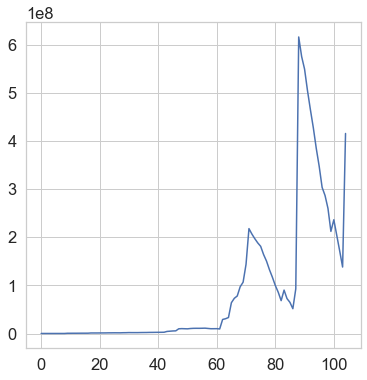

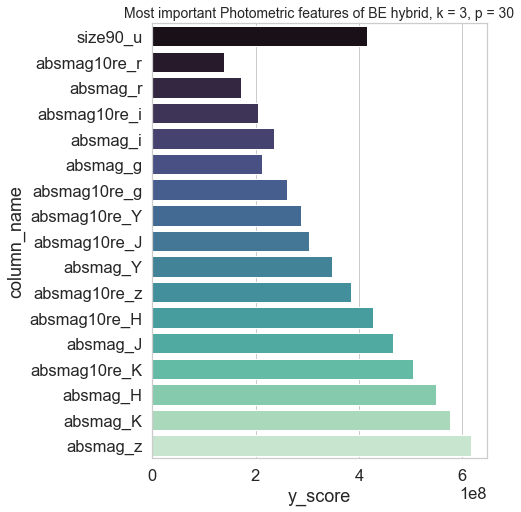

(     column_name       y_score
 16      size90_u  4.159576e+08
 15  absmag10re_r  1.383550e+08
 14      absmag_r  1.719223e+08
 13  absmag10re_i  2.044045e+08
 12      absmag_i  2.366243e+08
 11      absmag_g  2.124601e+08
 10  absmag10re_g  2.602106e+08
 9   absmag10re_Y  2.870027e+08
 8   absmag10re_J  3.039085e+08
 7       absmag_Y  3.476782e+08
 6   absmag10re_z  3.849911e+08
 5   absmag10re_H  4.276010e+08
 4       absmag_J  4.652658e+08
 3   absmag10re_K  5.050876e+08
 2       absmag_H  5.497949e+08
 1       absmag_K  5.759125e+08
 0       absmag_z  6.165596e+08,
 array([2.49960810e+05, 2.54348745e+05, 2.54942206e+05, 2.56110057e+05,
        2.56902844e+05, 2.57913731e+05, 2.60173284e+05, 2.61627441e+05,
        2.62888614e+05, 6.96359094e+05, 6.93594149e+05, 7.37944489e+05,
        7.41594476e+05, 7.98258127e+05, 8.34645540e+05, 8.45380078e+05,
        8.60340421e+05, 1.28383278e+06, 1.29269094e+06, 1.29586532e+06,
        1.35274458e+06, 1.38240306e+06, 1.42341124e+06, 1.56995

In [22]:
plot_BE(phot_eif, k = 3, p = 30, remake=False)

New file requested
Failed to find Hybrid results, or remake requested
Settings: Database: Direct_Summation, k = 3, p = 30
New laplacian file requested
Failed to find Laplacian results, creating database
51  remaining features
initial y_best: 51170.34, BH_CAI_EW
Laplace rank: 50, new y_best: 53253.00, TIO1_EW
Laplace rank: 49, new y_best: 54209.01, HGVA275_EW
Laplace rank: 48, new y_best: 54535.89, NII5755_EW
Laplace rank: 47, new y_best: 55212.28, HGVA200_EW
Laplace rank: 46, new y_best: 56190.62, SIII6312_EW
Laplace rank: 45, new y_best: 59917.40, HGVA125_EW
Laplace rank: 44, new y_best: 68610.01, CN2_EW
Laplace rank: 43, OI6364_EW
Laplace rank: 42, CN1_EW
Laplace rank: 41, TIO2_EW
Laplace rank: 40, new y_best: 70099.16, FE5782_EW
Laplace rank: 39, new y_best: 71780.94, BH_MH_EW
Laplace rank: 38, new y_best: 74133.86, OI6300_EW
Laplace rank: 37, FE5709_EW
Laplace rank: 36, MG1_EW
Laplace rank: 35, new y_best: 76007.47, BH_CNB_EW
Laplace rank: 34, new y_best: 86617.26, BH_HB_EW
Laplace

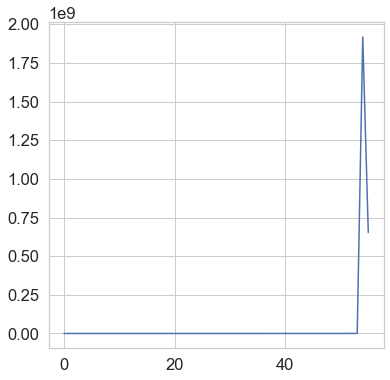

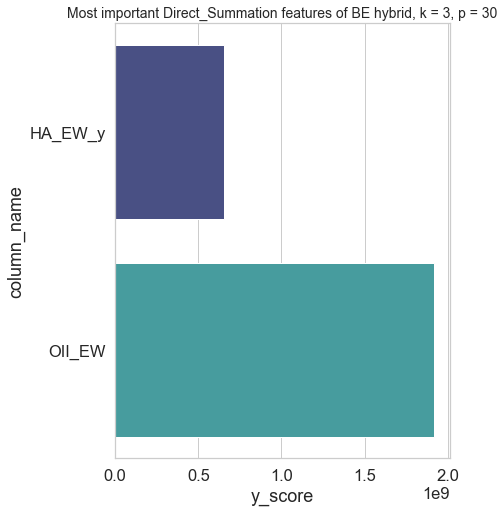

(  column_name       y_score
 1     HA_EW_y  6.533079e+08
 0      OII_EW  1.918360e+09,
 [51170.34418583785,
  53253.002731618166,
  54209.00715359483,
  54535.892106178595,
  55212.284261530396,
  56190.62191437493,
  59917.403187238524,
  68610.01244826279,
  68583.80299566894,
  68565.84898185101,
  68562.11458989418,
  70099.16216460816,
  71780.94296450232,
  74133.85859789493,
  73260.76539989168,
  74099.6867519612,
  76007.46826149474,
  86617.25676835442,
  86233.23916225364,
  86843.96553050776,
  88259.08538713345,
  90504.29414220156,
  100105.77646068801,
  102047.98618151607,
  109867.0291767323,
  115888.98378974089,
  115136.16444139229,
  120881.92610500667,
  121273.71066482711,
  117532.27281745875,
  118158.92689732928,
  122700.36460113645,
  117729.91779425036,
  108297.24869515644,
  112509.6098860084,
  112457.55976321062,
  124787.32912667656,
  136596.46706630022,
  153810.55119601285,
  132018.02012932883,
  144415.26015540666,
  158102.5427503637,
  170328.2

In [24]:
plot_BE(ds_eif, k = 3, p = 30, remake=True)

New file requested
Failed to find Hybrid results, or remake requested
Settings: Database: Spectral, k = 3, p = 30
New laplacian file requested
Failed to find Laplacian results, creating database
13  remaining features
initial y_best: 122369.38, OIB_EW
Laplace rank: 12, new y_best: 135026.25, OIR_EW
Laplace rank: 11, new y_best: 165878.94, SIIR_EW_x
Laplace rank: 10, new y_best: 176394.08, NIIB_EW_x
Laplace rank: 9, new y_best: 253628.04, SIIB_EW_x
Laplace rank: 8, new y_best: 440016.94, NIIR_EW_x
Laplace rank: 7, new y_best: 494606.64, D4000N
Laplace rank: 6, new y_best: 579366.85, OIIIB_EW_x
Laplace rank: 5, new y_best: 710439.45, OIIIR_EW_x
Laplace rank: 4, new y_best: 1365422.35, HB_EW_x
Laplace rank: 3, new y_best: 1592566.40, OIIB_EW
Laplace rank: 2, OIIR_EW
Laplace rank: 1, HA_EW_x
recursion
New laplacian file requested
Failed to find Laplacian results, creating database
3  remaining features
initial y_best: 87066170.69, OIIB_EW
Laplace rank: 2, new y_best: 366838966.80, OIIR_EW


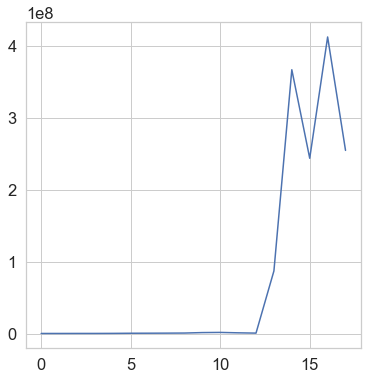

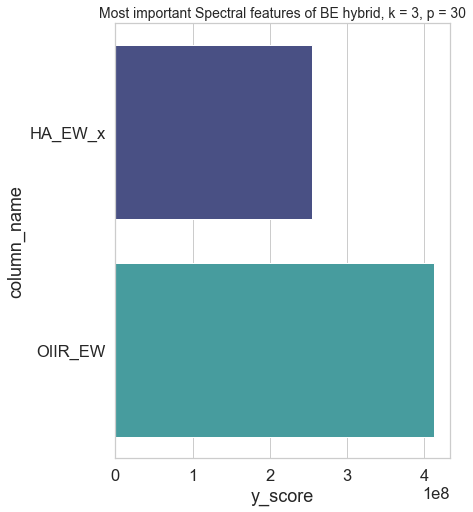

(  column_name       y_score
 1     HA_EW_x  2.546759e+08
 0     OIIR_EW  4.123849e+08,
 [122369.37868999914,
  135026.24742506634,
  165878.93967966412,
  176394.07551653025,
  253628.0404161197,
  440016.9409495721,
  494606.63885390374,
  579366.8513960073,
  710439.4506396526,
  1365422.3473696792,
  1592566.395621572,
  1024527.9002147301,
  617637.6828571444,
  87066170.68867648,
  366838966.80100816,
  243713173.81509256,
  412384863.27267396,
  254675904.1865018])

In [38]:
plot_BE(spec_eif, k = 3, p = 30, remake=True)

In [41]:
phot

absmag_u  absmag10re_u   size90_u   sizeRE_u  SersicIndex_u  \
CATAID                                                                  
6802    -16.498930    -16.498930   1.693470   1.217394         0.0898   
6837    -18.530791    -18.530265  13.819605   4.843815         1.5455   
6838    -17.886899    -17.877645  24.967339   6.598801         2.4551   
6840    -19.391659    -19.391626  14.594531   5.791895         1.2069   
6846    -18.610924    -18.610924  17.420147   7.471441         1.0143   
...            ...           ...        ...        ...            ...   
3901140 -20.361342    -20.344532  81.870811  19.338365         2.8713   
3901178 -19.882443    -19.881783  38.374570  13.263538         1.5860   
3901184 -18.909851    -18.909851  11.606056   8.416164         0.0770   
3901441 -17.400572    -17.400572   6.448936   4.732271         0.0578   
3901768 -19.220608    -19.220547  21.666105   8.399797         1.2677   

         Ellipticity_u     MU@0_u     MU@E_u   MUEAVG_u   absmag_g  ...  \
CATAID                                                              ...   
6802            0.6091  21.654612  21.669508  21.656874 -17.555164  ...   
6837            0.6322  20.558409  23.560274  22.653215 -19.266915  ...   
6838            0.8897  18.827776  23.801743  22.661787 -18.610079  ...   
6840            0.4717  21.729763  23.998838  23.212090 -20.820333  ...   
6846            0.4178  22.907486  24.760576  24.056118 -19.384048  ...   
...                ...        ...        ...        ...        ...  ...   
3901140         0.3272  20.068914  25.945927  24.725466 -20.998192  ...   
3901178         0.4871  21.769482  24.859074  23.939238 -20.724281  ...   
3901184         0.7276  23.465967  23.473627  23.466990 -19.712476  ...   
3901441         0.7700  23.272833  23.274494  23.273005 -18.679909  ...   
3901768         0.5981  21.735662  24.136213  23.325834 -20.199397  ...   

          MUEAVG_H   absmag_K  absmag10re_K   size90_K  sizeRE_K  \
CATAID                                                             
6802     18.456911 -18.329572    -18.329572   2.261476  1.108027   
6837     19.762506 -20.007647    -20.007439  10.125538  3.729863   
6838     20.511658 -18.673820    -18.673820   4.348900  2.681564   
6840     19.460093 -22.310853    -22.242091  27.258364  3.930294   
6846     20.906399 -19.771163    -19.770997   7.780783  2.896070   
...            ...        ...           ...        ...       ...   
3901140  19.057545 -22.518262    -22.517982  14.780808  5.364245   
3901178  20.321295 -22.280827    -22.276864  24.200325  7.178157   
3901184  18.970451 -21.377947    -21.377947   9.837084  4.388598   
3901441  19.332991 -20.077042    -20.077042   8.365297  3.968394   
3901768  20.013775 -21.221068    -21.221068  12.165849  5.381250   

         SersicIndex_K  Ellipticity_K     MU@0_K     MU@E_K   MUEAVG_K  
CATAID                                                                  
6802            0.7182         0.6687  18.497427  19.713715  19.165457  
6837            1.4055         0.7441  17.953623  20.652346  19.791887  
6838            0.3063         0.5852  20.817305  21.172449  20.947062  
6840            5.0644         0.1076   9.613863  20.251350  18.734308  
6846            1.3770         0.2079  18.889442  21.526478  20.676010  
...                ...            ...        ...        ...        ...  
3901140         1.4468         0.2938  17.014204  19.802336  18.927713  
3901178         2.0599         0.2299  16.817368  20.934143  19.883492  
3901184         0.9222         0.7988  17.368603  19.023146  18.362799  
3901441         0.7861         0.8142  18.770353  20.132202  19.544125  
3901768         0.9419         0.5615  18.764030  20.461014  19.790936  

[10047 rows x 81 columns]

New file requested
Failed to find Hybrid results, or remake requested
Settings: Database: full, k = 3, p = 30
New laplacian file requested
Failed to find Laplacian results, creating database
145  remaining features
initial y_best: 173599.50, TIO1_EW
Laplace rank: 144, new y_best: 176893.01, BH_CAI_EW
Laplace rank: 143, new y_best: 179372.53, HGVA200_EW
Laplace rank: 142, new y_best: 181826.58, HGVA275_EW
Laplace rank: 141, new y_best: 183063.64, SIII6312_EW
Laplace rank: 140, new y_best: 186406.10, TIO2_EW
Laplace rank: 139, new y_best: 186654.39, HGVA125_EW
Laplace rank: 138, new y_best: 187090.49, FE5782_EW
Laplace rank: 137, new y_best: 190478.74, BH_FC_EW
Laplace rank: 136, new y_best: 193788.78, BH_CNB_EW
Laplace rank: 135, new y_best: 194118.28, MG1_EW
Laplace rank: 134, new y_best: 199857.78, OIR_EW
Laplace rank: 133, new y_best: 201058.33, BH_MGG_EW
Laplace rank: 132, new y_best: 201613.00, CN2_EW
Laplace rank: 131, new y_best: 206871.11, CN1_EW
Laplace rank: 130, new y_best: 2

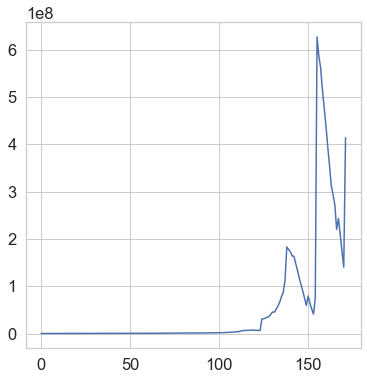

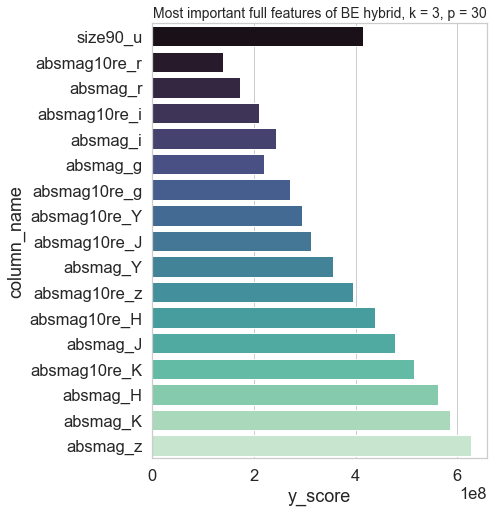

(     column_name       y_score
 16      size90_u  4.138684e+08
 15  absmag10re_r  1.402304e+08
 14      absmag_r  1.735439e+08
 13  absmag10re_i  2.098676e+08
 12      absmag_i  2.431197e+08
 11      absmag_g  2.200301e+08
 10  absmag10re_g  2.713773e+08
 9   absmag10re_Y  2.938508e+08
 8   absmag10re_J  3.116058e+08
 7       absmag_Y  3.552482e+08
 6   absmag10re_z  3.947718e+08
 5   absmag10re_H  4.389996e+08
 4       absmag_J  4.765430e+08
 3   absmag10re_K  5.151360e+08
 2       absmag_H  5.619787e+08
 1       absmag_K  5.862315e+08
 0       absmag_z  6.266126e+08,
 [173599.49658100988,
  176893.007690031,
  179372.5303945839,
  181826.58475479853,
  183063.64468617822,
  186406.10317215434,
  186654.3909464047,
  187090.49164055157,
  190478.74117418256,
  193788.78207308994,
  194118.2817747606,
  199857.77590255736,
  201058.3251975231,
  201613.00147178315,
  206871.11230637366,
  209795.06778931312,
  210641.49141733896,
  215676.05878200207,
  217338.74044341434,
  217791.23

In [37]:
plot_BE(full_eif, k = 3, p = 30, remake=True)

absmag_u  absmag10re_u   size90_u   sizeRE_u  SersicIndex_u  \
CATAID                                                                  
6802    -16.498930    -16.498930   1.693470   1.217394         0.0898   
6837    -18.530791    -18.530265  13.819605   4.843815         1.5455   
6838    -17.886899    -17.877645  24.967339   6.598801         2.4551   
6840    -19.391659    -19.391626  14.594531   5.791895         1.2069   
6846    -18.610924    -18.610924  17.420147   7.471441         1.0143   
...            ...           ...        ...        ...            ...   
3901140 -20.361342    -20.344532  81.870811  19.338365         2.8713   
3901178 -19.882443    -19.881783  38.374570  13.263538         1.5860   
3901184 -18.909851    -18.909851  11.606056   8.416164         0.0770   
3901441 -17.400572    -17.400572   6.448936   4.732271         0.0578   
3901768 -19.220608    -19.220547  21.666105   8.399797         1.2677   

         Ellipticity_u     MU@0_u     MU@E_u   MUEAVG_u   absmag_g  ...  \
CATAID                                                              ...   
6802            0.6091  21.654612  21.669508  21.656874 -17.555164  ...   
6837            0.6322  20.558409  23.560274  22.653215 -19.266915  ...   
6838            0.8897  18.827776  23.801743  22.661787 -18.610079  ...   
6840            0.4717  21.729763  23.998838  23.212090 -20.820333  ...   
6846            0.4178  22.907486  24.760576  24.056118 -19.384048  ...   
...                ...        ...        ...        ...        ...  ...   
3901140         0.3272  20.068914  25.945927  24.725466 -20.998192  ...   
3901178         0.4871  21.769482  24.859074  23.939238 -20.724281  ...   
3901184         0.7276  23.465967  23.473627  23.466990 -19.712476  ...   
3901441         0.7700  23.272833  23.274494  23.273005 -18.679909  ...   
3901768         0.5981  21.735662  24.136213  23.325834 -20.199397  ...   

         HGVA125_EW    HGF_EW    HGA_EW  G4300_EW  CA4227_EW    CN2_EW  \
CATAID                                                                   
6802       0.196930  1.659956  2.376555 -7.079205   0.294137  0.228589   
6837       0.084154 -1.563378 -3.370488  4.110785   1.398956 -0.042376   
6838       0.191652 -7.249705 -5.492196 -2.449695   0.602401 -0.045479   
6840       0.152244 -0.876695  3.178101 -5.746708  -3.650215 -0.107605   
6846      -0.018575 -0.474186  0.391324 -1.000964  -1.134056 -0.029514   
...             ...       ...       ...       ...        ...       ...   
3901140    0.089189  0.479922  4.411610  1.984872  -1.751637 -0.040141   
3901178    0.062577  1.632197  0.099033 -2.650076  -1.143423  0.053334   
3901184   -0.029447 -4.794718 -3.694124  7.527526  -1.669704 -0.111379   
3901441    0.037110 -1.966722 -0.405885 -0.853234  -1.119621 -0.039646   
3901768    0.072656 -0.881421 -0.387746 -3.123395  -1.092533 -0.005144   

           CN1_EW    HDF_EW    HDA_EW     OII_EW  
CATAID                                            
6802     0.115305 -0.445192  5.106353  22.621220  
6837    -0.055087 -2.672220 -1.597525  31.437363  
6838    -0.041801 -3.263513 -1.605200   4.142478  
6840     0.034390  1.990391 -0.833084  -1.854510  
6846    -0.060556 -2.460188 -3.570271   8.357266  
...           ...       ...       ...        ...  
3901140 -0.077261 -3.309701 -3.840308   4.008181  
3901178  0.004347 -3.426721 -3.283710   3.261348  
3901184 -0.199986 -2.915524  6.258958  90.554977  
3901441 -0.063568 -2.228087 -3.227602  18.153252  
3901768 -0.081116 -3.093034 -5.734492  10.064606  

[10047 rows x 145 columns]